In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style="darkgrid")


import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel("Fried food consumption and mortality_Kaggle Data Set.xlsx")
df.drop(df.index[[0,1]], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
0,Race,White,90.5,87.9,82.2,77.1,68.5,<0.001
1,Race,Black,4.4,5.5,8.5,11.3,17.2,NaN
2,Race,Hispanic,2.4,3,4.2,5.7,7.7,NaN
3,Race,Others,2.5,3.3,5,5.8,6.5,NaN
4,Race,Missing,0.3,0.3,0.2,0.2,0.2,NaN


In [3]:
df.sample(10)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
46,Diet,Dietary total fat (%E),23.6 (7.5),27.9 (7.5),32.5 (7.4),36.0 (7.3),39.0 (7.0),<0.001
40,Dibaties,Baseline cancer,1.5,1.5,1.5,1.6,1.3,0.73
3,Race,Others,2.5,3.3,5,5.8,6.5,NaN
52,Diet,Nuts and legumes (servings/day),0.2 (0.3),0.2 (0.3),0.2 (0.3),0.3 (0.3),0.4 (0.4),<0.001
33,Alcohol Drinker,Moderate drinker of alcohol,45.1,47.8,46.9,43.5,39.6,NaN
43,BMI,â‰¥30 BMI,17.3,21.2,29,35.8,44.3,NaN
25,Smoker,Past smoker,45.7,42.7,40.4,39.7,40.3,NaN
16,NaN,Unopposed estrogen use:,NaN,NaN,NaN,NaN,NaN,NaN
4,Race,Missing,0.3,0.3,0.2,0.2,0.2,NaN
48,Diet,Vegetables (servings/day),2.9 (1.5),2.5 (1.4),2.3 (1.3),2.3 (1.3),2.5 (1.4),<0.001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Category                      50 non-null     object
 1   Factors                       61 non-null     object
 2   None (n=15 166)               56 non-null     object
 3   <1 serving/week (n=38 482)    56 non-null     object
 4   1-2 servings/week (n=33 210)  56 non-null     object
 5   3-6 servings/week (n=15 480)  56 non-null     object
 6   â‰¥1 serving/day (n=4628)     56 non-null     object
 7   P                             30 non-null     object
dtypes: object(8)
memory usage: 4.1+ KB


In [5]:
df.describe()

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
count,50,61,56,56,56.0,56.0,56.0,30
unique,11,60,56,56,54.0,55.0,55.0,3
top,Diet,Missing,7,0.8 (0.8),27.2,5.8,1.3,<0.001
freq,10,2,1,1,2.0,2.0,2.0,28


In [6]:
#Creating multiple group by categories

grouped = df.groupby(df.Category)

#creating newdataframe for Categories
df1 = grouped.get_group("Race")
df2 = grouped.get_group("Degree")
df3 = grouped.get_group("Salary")
df4 = grouped.get_group("Unopposed estrogen use:")
df5 = grouped.get_group("Smoker")
df6 = grouped.get_group("Physical activity")
df7 = grouped.get_group("Alcohol Drinker")
df8 = grouped.get_group("Coffee Drinker")
df9 = grouped.get_group("Dibaties")
df10 = grouped.get_group("BMI")
df11= grouped.get_group("Diet")


In [7]:
#convert object datatype to float Dtype
df1['None (n=15 166)'] = df1['None (n=15 166)'].astype(float)
df1['<1 serving/week (n=38 482)'] = df1['<1 serving/week (n=38 482)'].astype(float)
df1['1-2 servings/week (n=33 210)'] = df1['1-2 servings/week (n=33 210)'].astype(float)
df1['3-6 servings/week (n=15 480)'] = df1['3-6 servings/week (n=15 480)'].astype(float)
df1['â‰¥1 serving/day (n=4628)'] = df1['â‰¥1 serving/day (n=4628)'].astype(float)

df2['None (n=15 166)'] = df2['None (n=15 166)'].astype(float)
df2['<1 serving/week (n=38 482)'] = df2['<1 serving/week (n=38 482)'].astype(float)
df2['1-2 servings/week (n=33 210)'] = df2['1-2 servings/week (n=33 210)'].astype(float)
df2['3-6 servings/week (n=15 480)'] = df2['3-6 servings/week (n=15 480)'].astype(float)
df2['â‰¥1 serving/day (n=4628)'] = df2['â‰¥1 serving/day (n=4628)'].astype(float)

df3['None (n=15 166)'] = df3['None (n=15 166)'].astype(float)
df3['<1 serving/week (n=38 482)'] = df3['<1 serving/week (n=38 482)'].astype(float)
df3['1-2 servings/week (n=33 210)'] = df3['1-2 servings/week (n=33 210)'].astype(float)
df3['3-6 servings/week (n=15 480)'] = df3['3-6 servings/week (n=15 480)'].astype(float)
df3['â‰¥1 serving/day (n=4628)'] = df3['â‰¥1 serving/day (n=4628)'].astype(float)

df4['None (n=15 166)'] = df4['None (n=15 166)'].astype(float)
df4['<1 serving/week (n=38 482)'] = df4['<1 serving/week (n=38 482)'].astype(float)
df4['1-2 servings/week (n=33 210)'] = df4['1-2 servings/week (n=33 210)'].astype(float)
df4['3-6 servings/week (n=15 480)'] = df4['3-6 servings/week (n=15 480)'].astype(float)
df4['â‰¥1 serving/day (n=4628)'] = df4['â‰¥1 serving/day (n=4628)'].astype(float)


df5['None (n=15 166)'] = df5['None (n=15 166)'].astype(float)
df5['<1 serving/week (n=38 482)'] = df5['<1 serving/week (n=38 482)'].astype(float)
df5['1-2 servings/week (n=33 210)'] = df5['1-2 servings/week (n=33 210)'].astype(float)
df5['3-6 servings/week (n=15 480)'] = df5['3-6 servings/week (n=15 480)'].astype(float)
df5['â‰¥1 serving/day (n=4628)'] = df5['â‰¥1 serving/day (n=4628)'].astype(float)

df6['None (n=15 166)'] = df6['None (n=15 166)'].astype(float)
df6['<1 serving/week (n=38 482)'] = df6['<1 serving/week (n=38 482)'].astype(float)
df6['1-2 servings/week (n=33 210)'] = df6['1-2 servings/week (n=33 210)'].astype(float)
df6['3-6 servings/week (n=15 480)'] = df6['3-6 servings/week (n=15 480)'].astype(float)
df6['â‰¥1 serving/day (n=4628)'] = df6['â‰¥1 serving/day (n=4628)'].astype(float)

df7['None (n=15 166)'] = df7['None (n=15 166)'].astype(float)
df7['<1 serving/week (n=38 482)'] = df7['<1 serving/week (n=38 482)'].astype(float)
df7['1-2 servings/week (n=33 210)'] = df7['1-2 servings/week (n=33 210)'].astype(float)
df7['3-6 servings/week (n=15 480)'] = df7['3-6 servings/week (n=15 480)'].astype(float)
df7['â‰¥1 serving/day (n=4628)'] = df7['â‰¥1 serving/day (n=4628)'].astype(float)

#df8 can't convert object to float due to "2.1(1.7)" values

df9['None (n=15 166)'] = df9['None (n=15 166)'].astype(float)
df9['<1 serving/week (n=38 482)'] = df9['<1 serving/week (n=38 482)'].astype(float)
df9['1-2 servings/week (n=33 210)'] = df9['1-2 servings/week (n=33 210)'].astype(float)
df9['3-6 servings/week (n=15 480)'] = df9['3-6 servings/week (n=15 480)'].astype(float)
df9['â‰¥1 serving/day (n=4628)'] = df9['â‰¥1 serving/day (n=4628)'].astype(float)

df10['None (n=15 166)'] = df10['None (n=15 166)'].astype(float)
df10['<1 serving/week (n=38 482)'] = df10['<1 serving/week (n=38 482)'].astype(float)
df10['1-2 servings/week (n=33 210)'] = df10['1-2 servings/week (n=33 210)'].astype(float)
df10['3-6 servings/week (n=15 480)'] = df10['3-6 servings/week (n=15 480)'].astype(float)
df10['â‰¥1 serving/day (n=4628)'] = df10['â‰¥1 serving/day (n=4628)'].astype(float)

#df11 can't convert object to float due to "58.7(9.6)" values

In [8]:
#Print all grouped dataframe

#  df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11

### Insights

In [9]:
# Distribution graphs (histogram).
def DistributionPlot(df, nGraph, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80)
    for i in range(min(nCol, nGraph)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


#### Category = Race (df1)

In [10]:
df1.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
0,Race,White,90.5,87.9,82.2,77.1,68.5,<0.001
1,Race,Black,4.4,5.5,8.5,11.3,17.2,NaN


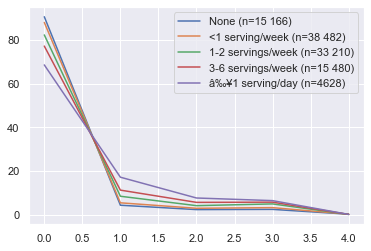

In [11]:
#line plot for Race category
plt.plot(df1['None (n=15 166)'])
plt.plot(df1['<1 serving/week (n=38 482)'])
plt.plot(df1['1-2 servings/week (n=33 210)'])
plt.plot(df1['3-6 servings/week (n=15 480)'])
plt.plot(df1['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] , loc='top right')

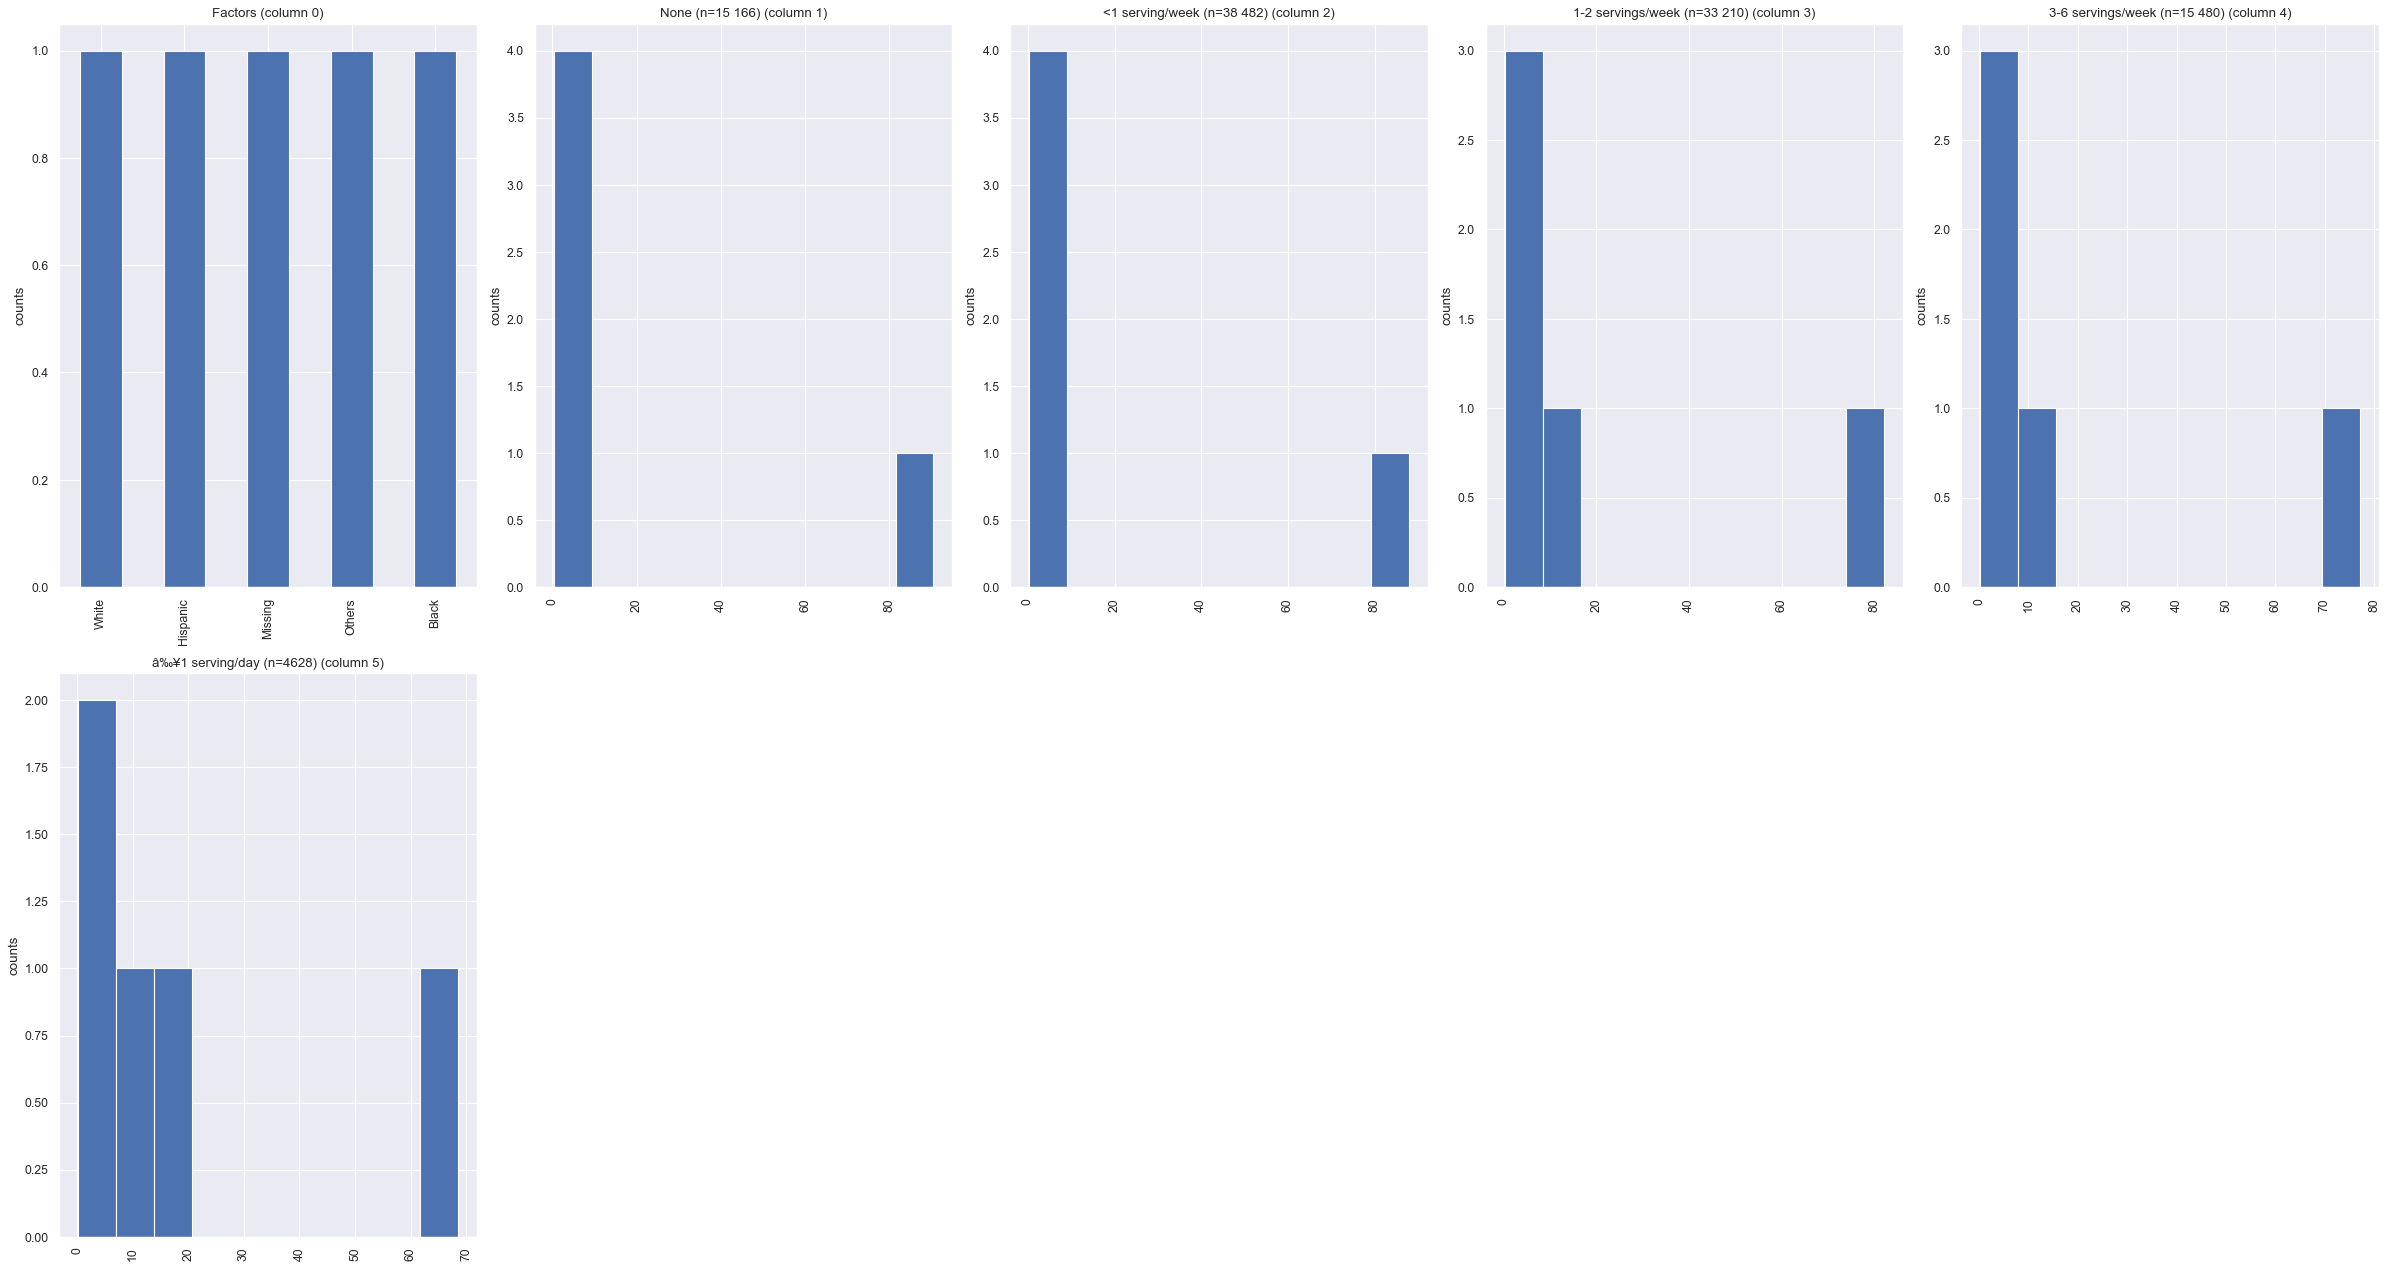

In [12]:
DistributionPlot(df1, 6, 5)

#### Category = Degree (df2)

In [13]:
df2.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
5,Degree,High school or less,24.6,28.8,34.2,38.8,44.9,<0.001
6,Degree,Some college,25.2,27.0,27.2,26.9,25.4,NaN


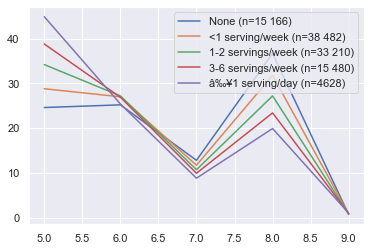

In [14]:
#line plot for Degree category
plt.plot(df2['None (n=15 166)'])
plt.plot(df2['<1 serving/week (n=38 482)'])
plt.plot(df2['1-2 servings/week (n=33 210)'])
plt.plot(df2['3-6 servings/week (n=15 480)'])
plt.plot(df2['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

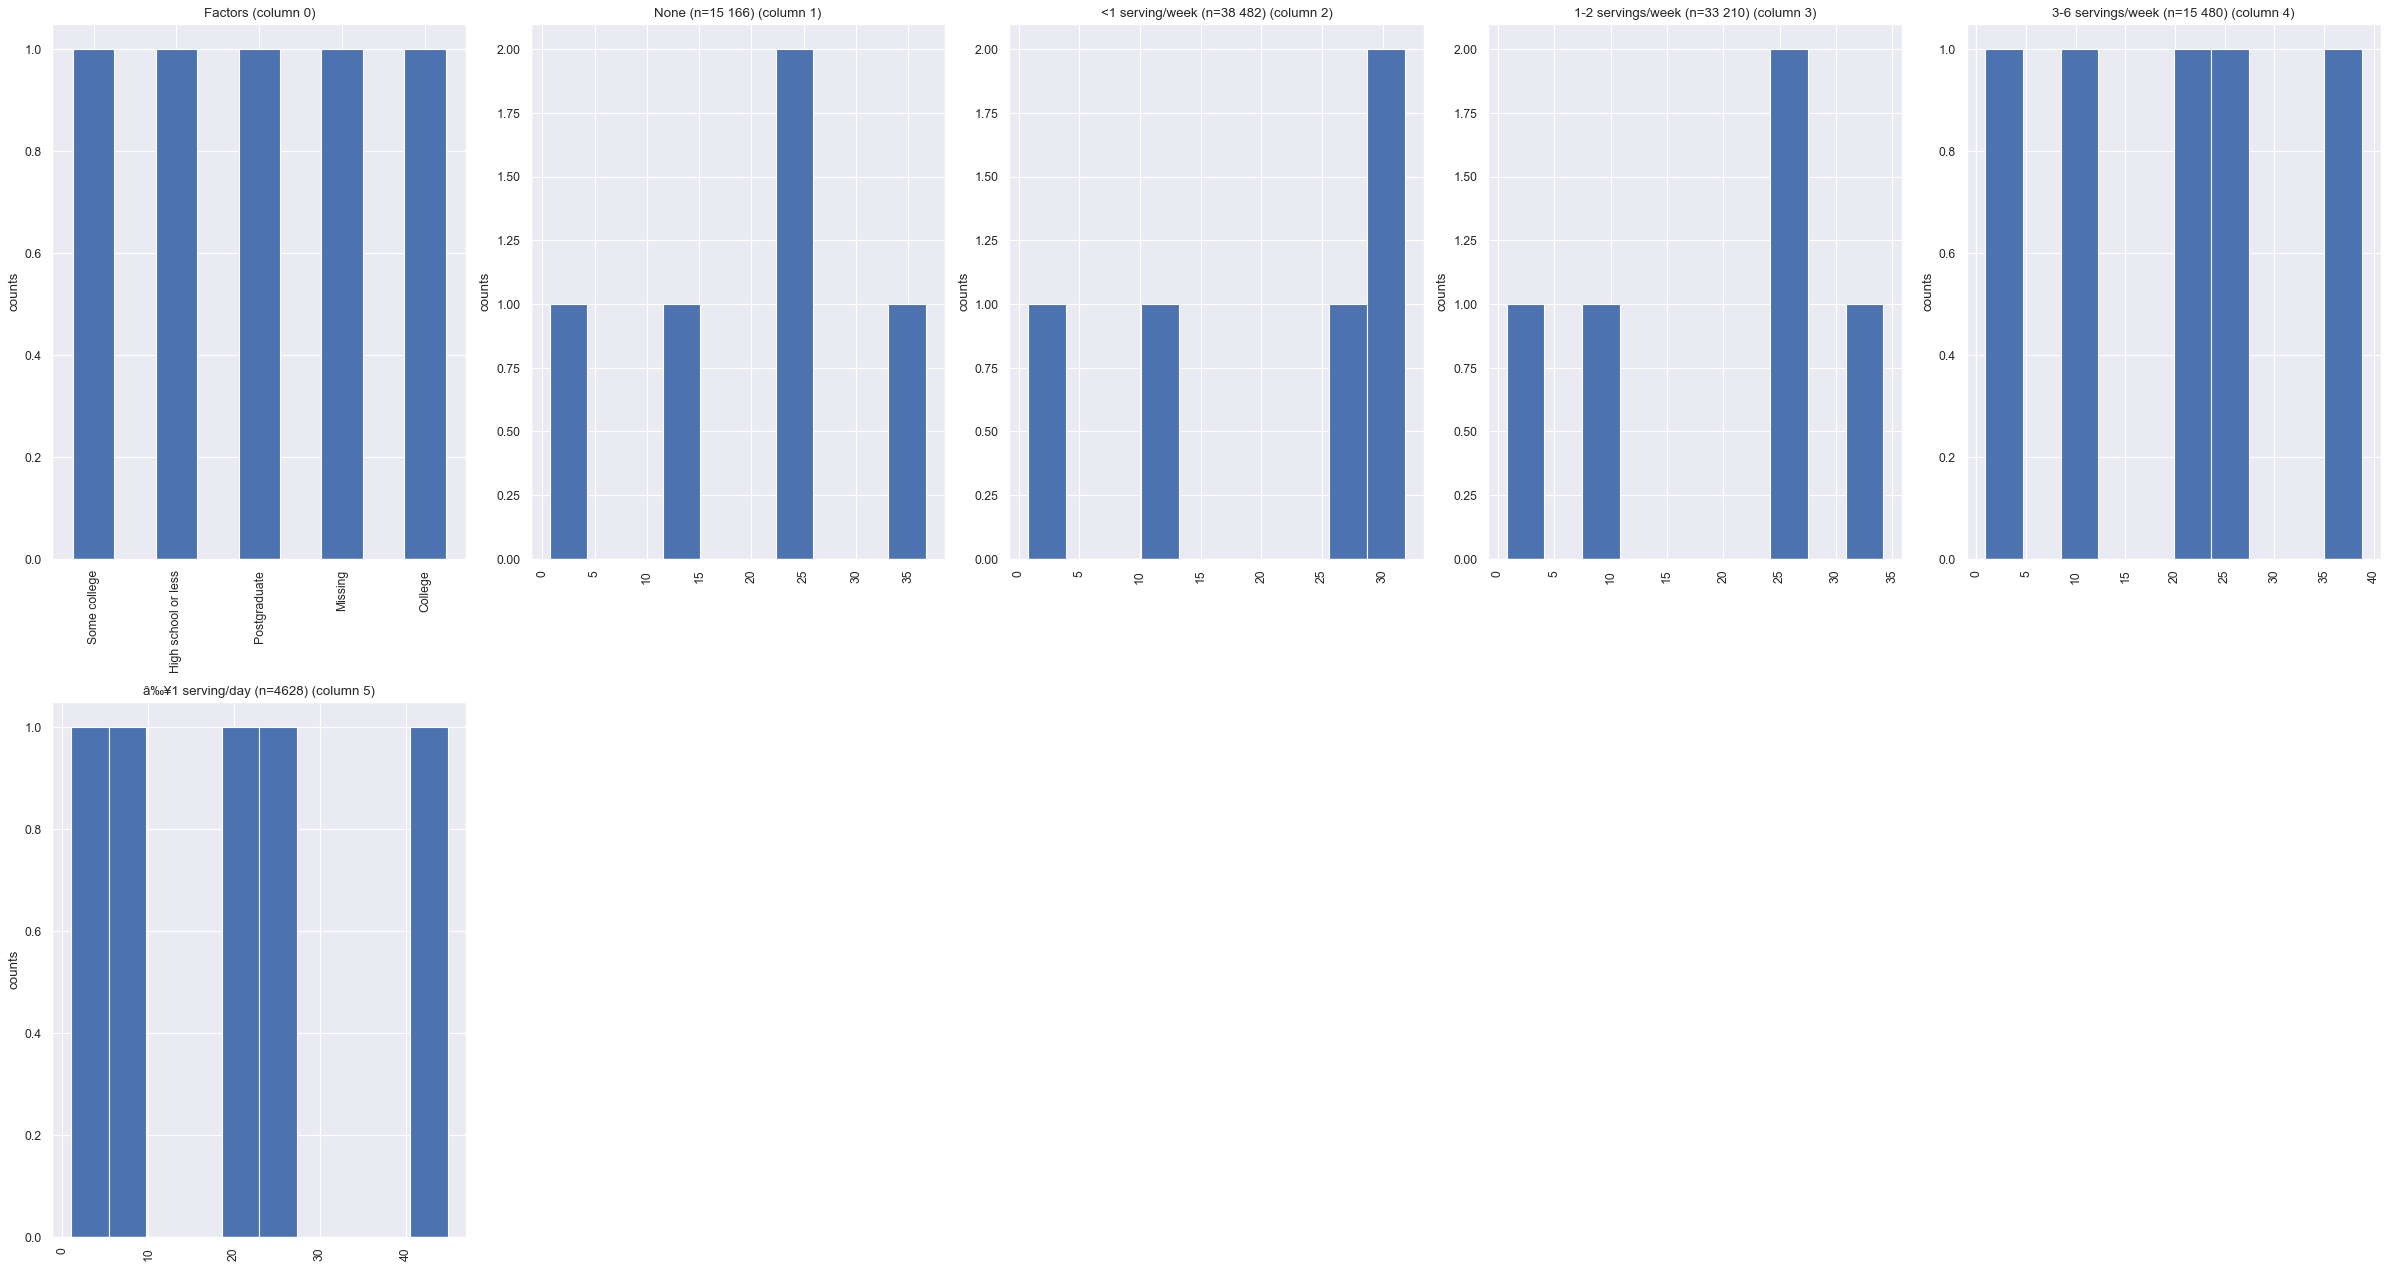

In [15]:
DistributionPlot(df2, 6, 5)

#### Category = Salary (df3)

In [16]:
df3.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
10,Salary,<$20 000 / yr,13.6,14.5,15.5,18.2,21.6,<0.001
11,Salary,$20 000-49 999 / yr,38.1,40.7,42.7,42.4,43.1,NaN


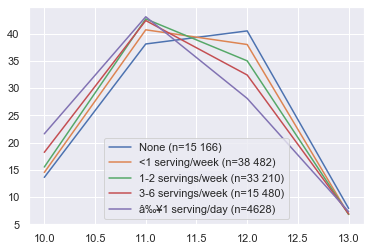

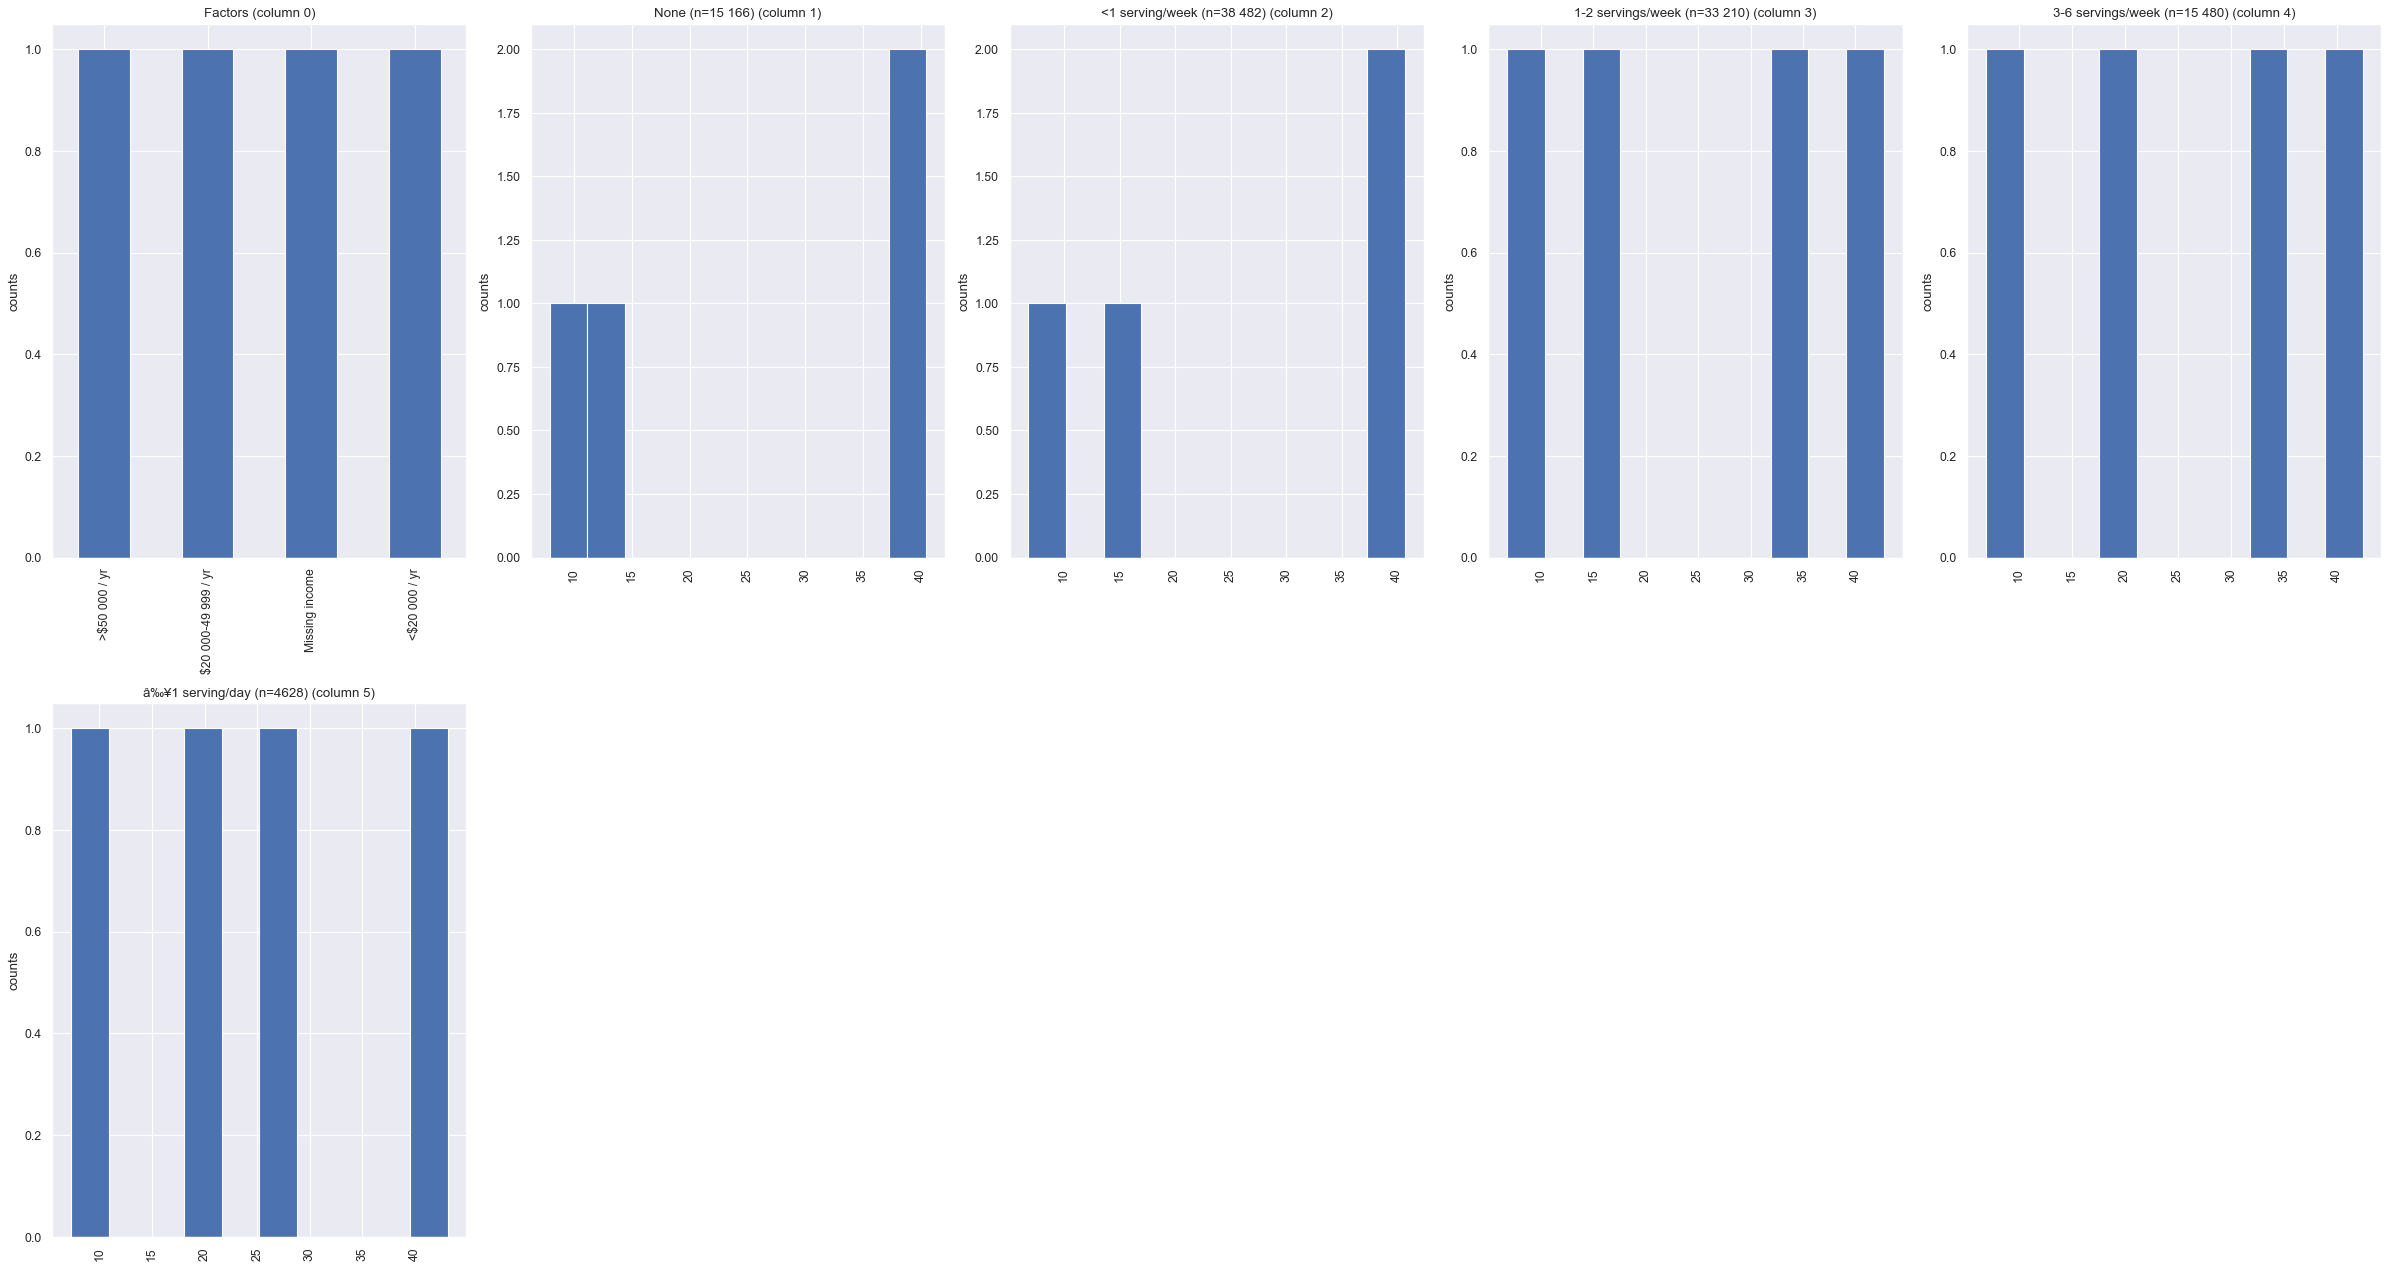

In [17]:

#line plot for Degree category
plt.plot(df3['None (n=15 166)'])
plt.plot(df3['<1 serving/week (n=38 482)'])
plt.plot(df3['1-2 servings/week (n=33 210)'])
plt.plot(df3['3-6 servings/week (n=15 480)'])
plt.plot(df3['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df3, 6, 5)

#### Category = Unopposed estrogen use

In [18]:
df4.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
17,Unopposed estrogen use:,Never used estrogen,67.1,64.5,64.0,65.9,66.8,<0.001
18,Unopposed estrogen use:,Past user / estrogen,13.0,13.7,13.6,13.1,12.8,NaN


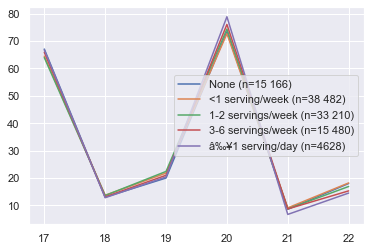

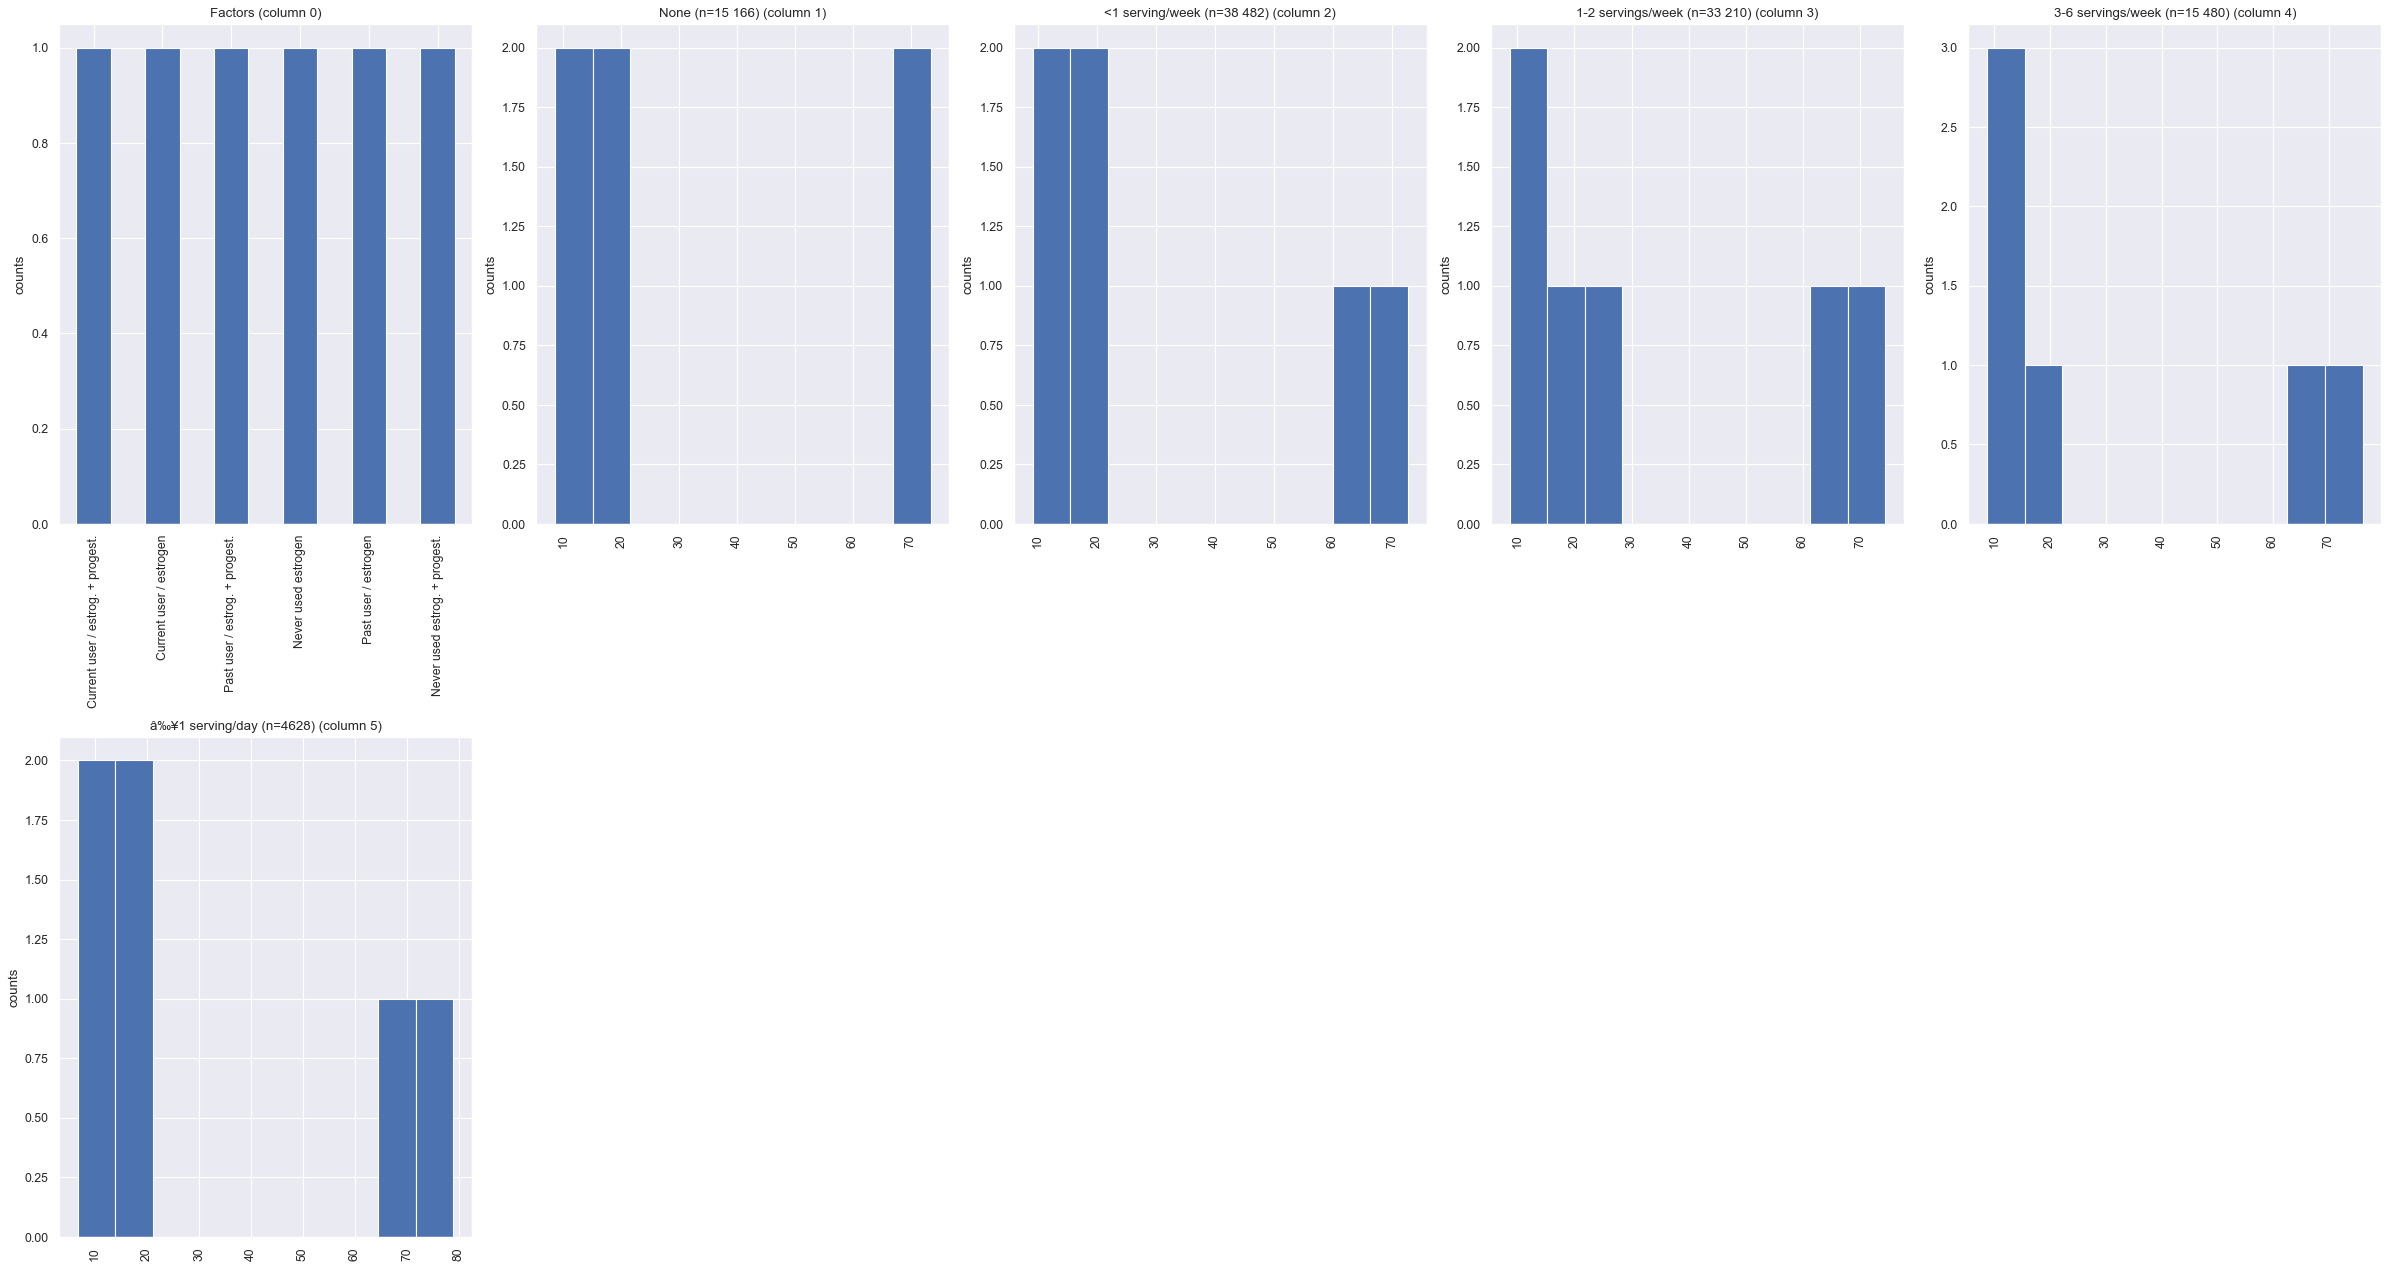

In [19]:

plt.plot(df4['None (n=15 166)'])
plt.plot(df4['<1 serving/week (n=38 482)'])
plt.plot(df4['1-2 servings/week (n=33 210)'])
plt.plot(df4['3-6 servings/week (n=15 480)'])
plt.plot(df4['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df4, 6, 5)

#### Category= Smoker

In [20]:
df5.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
24,Smoker,Never smoked,48.9,50.2,50.6,49.6,47.8,<0.001
25,Smoker,Past smoker,45.7,42.7,40.4,39.7,40.3,NaN


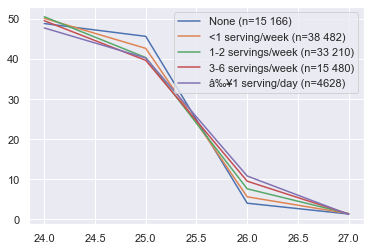

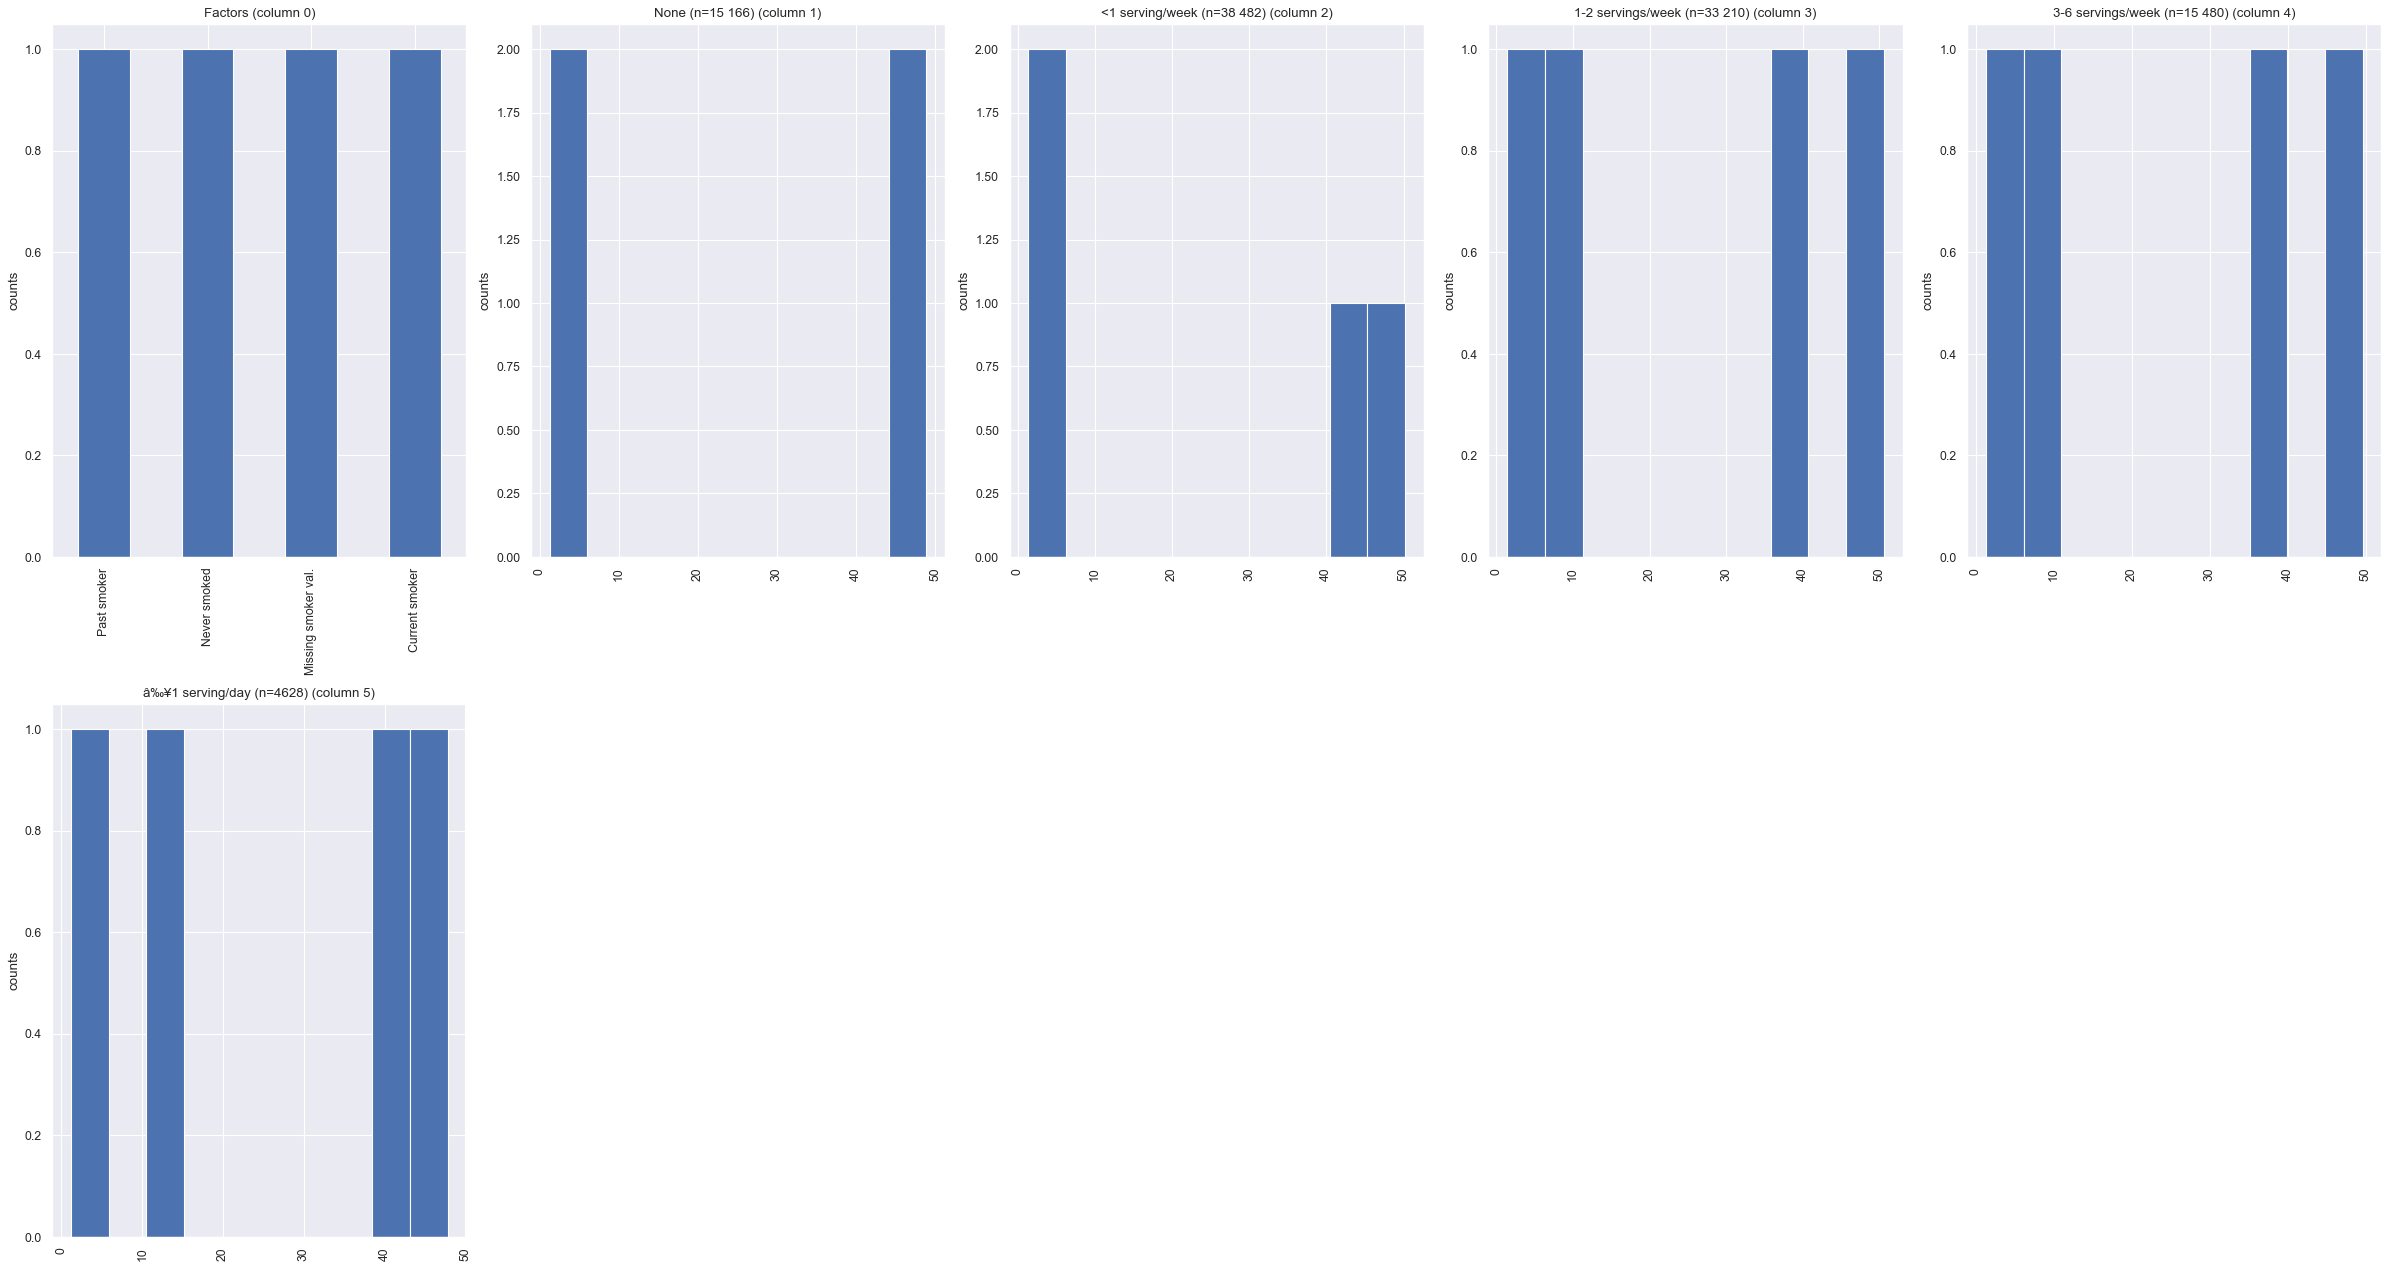

In [21]:


#line plot for Degree category
plt.plot(df5['None (n=15 166)'])
plt.plot(df5['<1 serving/week (n=38 482)'])
plt.plot(df5['1-2 servings/week (n=33 210)'])
plt.plot(df5['3-6 servings/week (n=15 480)'])
plt.plot(df5['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df5, 6, 5)

#### Category = Physical activity

In [22]:
df6.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
29,Physical activity,<10 hours physical activ. / week,36.3,45.2,53.5,59.8,64.7,<0.001
30,Physical activity,â‰¥10 hours physical activ. / week,61.9,52.8,44.2,38.0,33.1,NaN


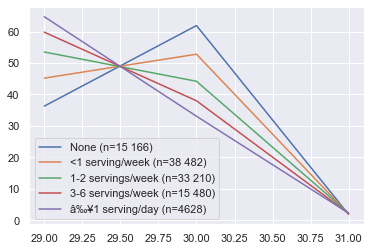

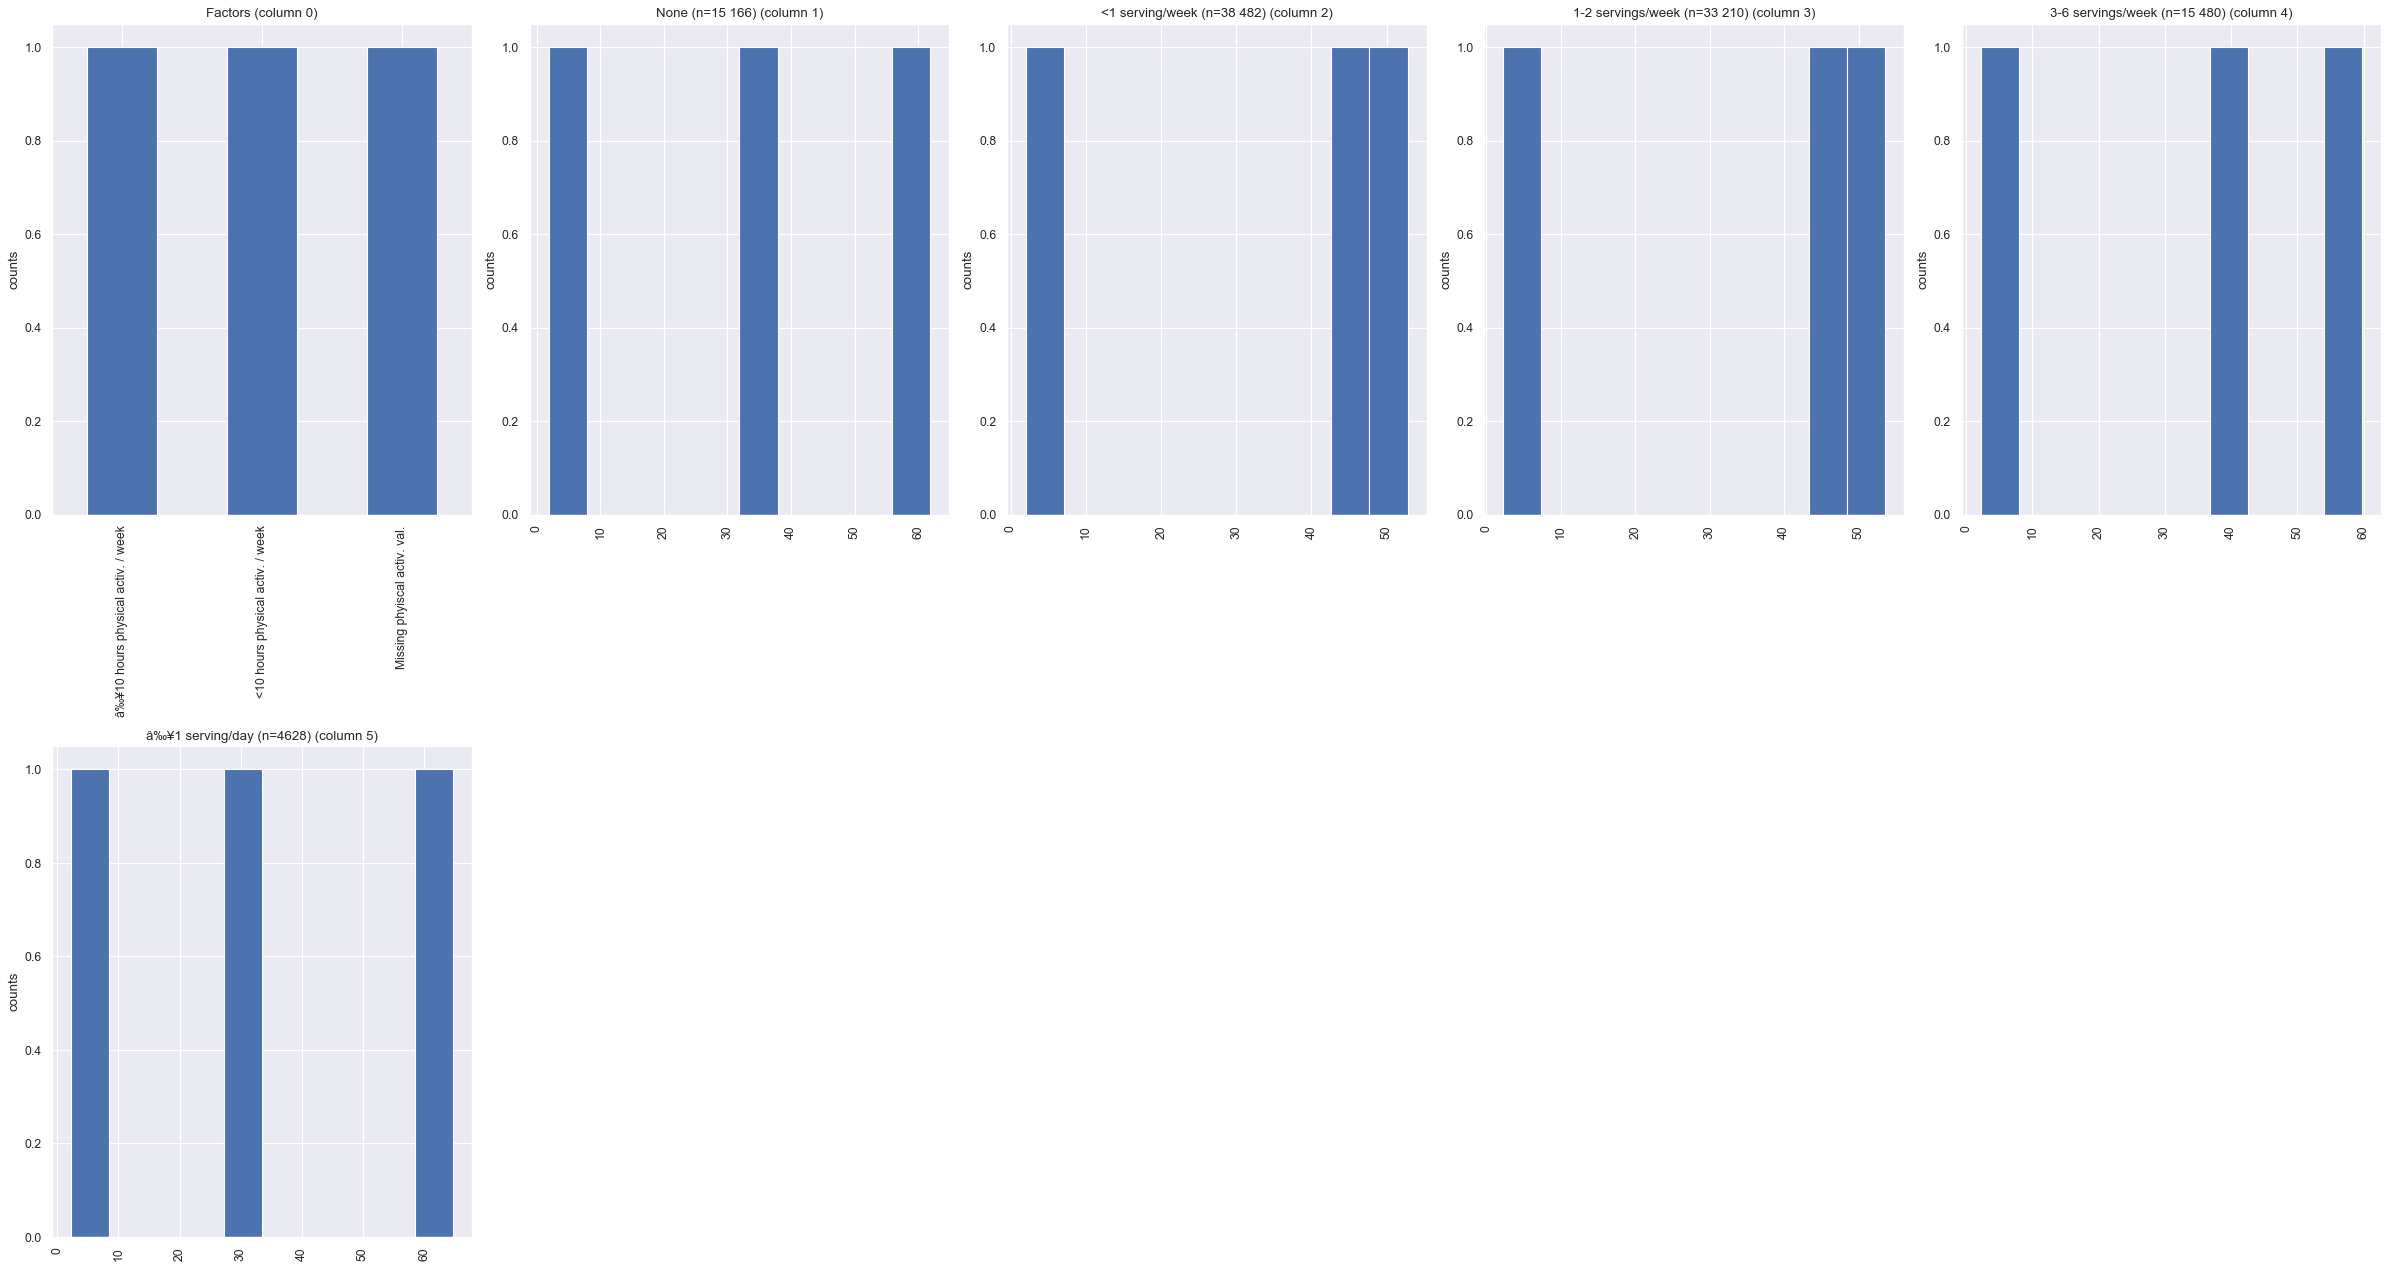

In [23]:
#line plot for Degree category
plt.plot(df6['None (n=15 166)'])
plt.plot(df6['<1 serving/week (n=38 482)'])
plt.plot(df6['1-2 servings/week (n=33 210)'])
plt.plot(df6['3-6 servings/week (n=15 480)'])
plt.plot(df6['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df6, 6, 5)

#### Category = Alcohol Drinker

In [24]:
df7.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
32,Alcohol Drinker,Non-drinker of alcohol,42.0,38.8,39.6,42.7,48.3,<0.001
33,Alcohol Drinker,Moderate drinker of alcohol,45.1,47.8,46.9,43.5,39.6,NaN


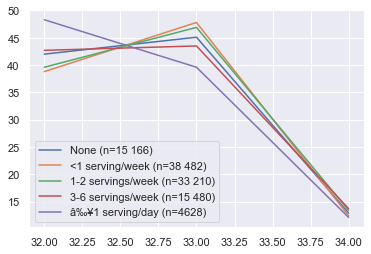

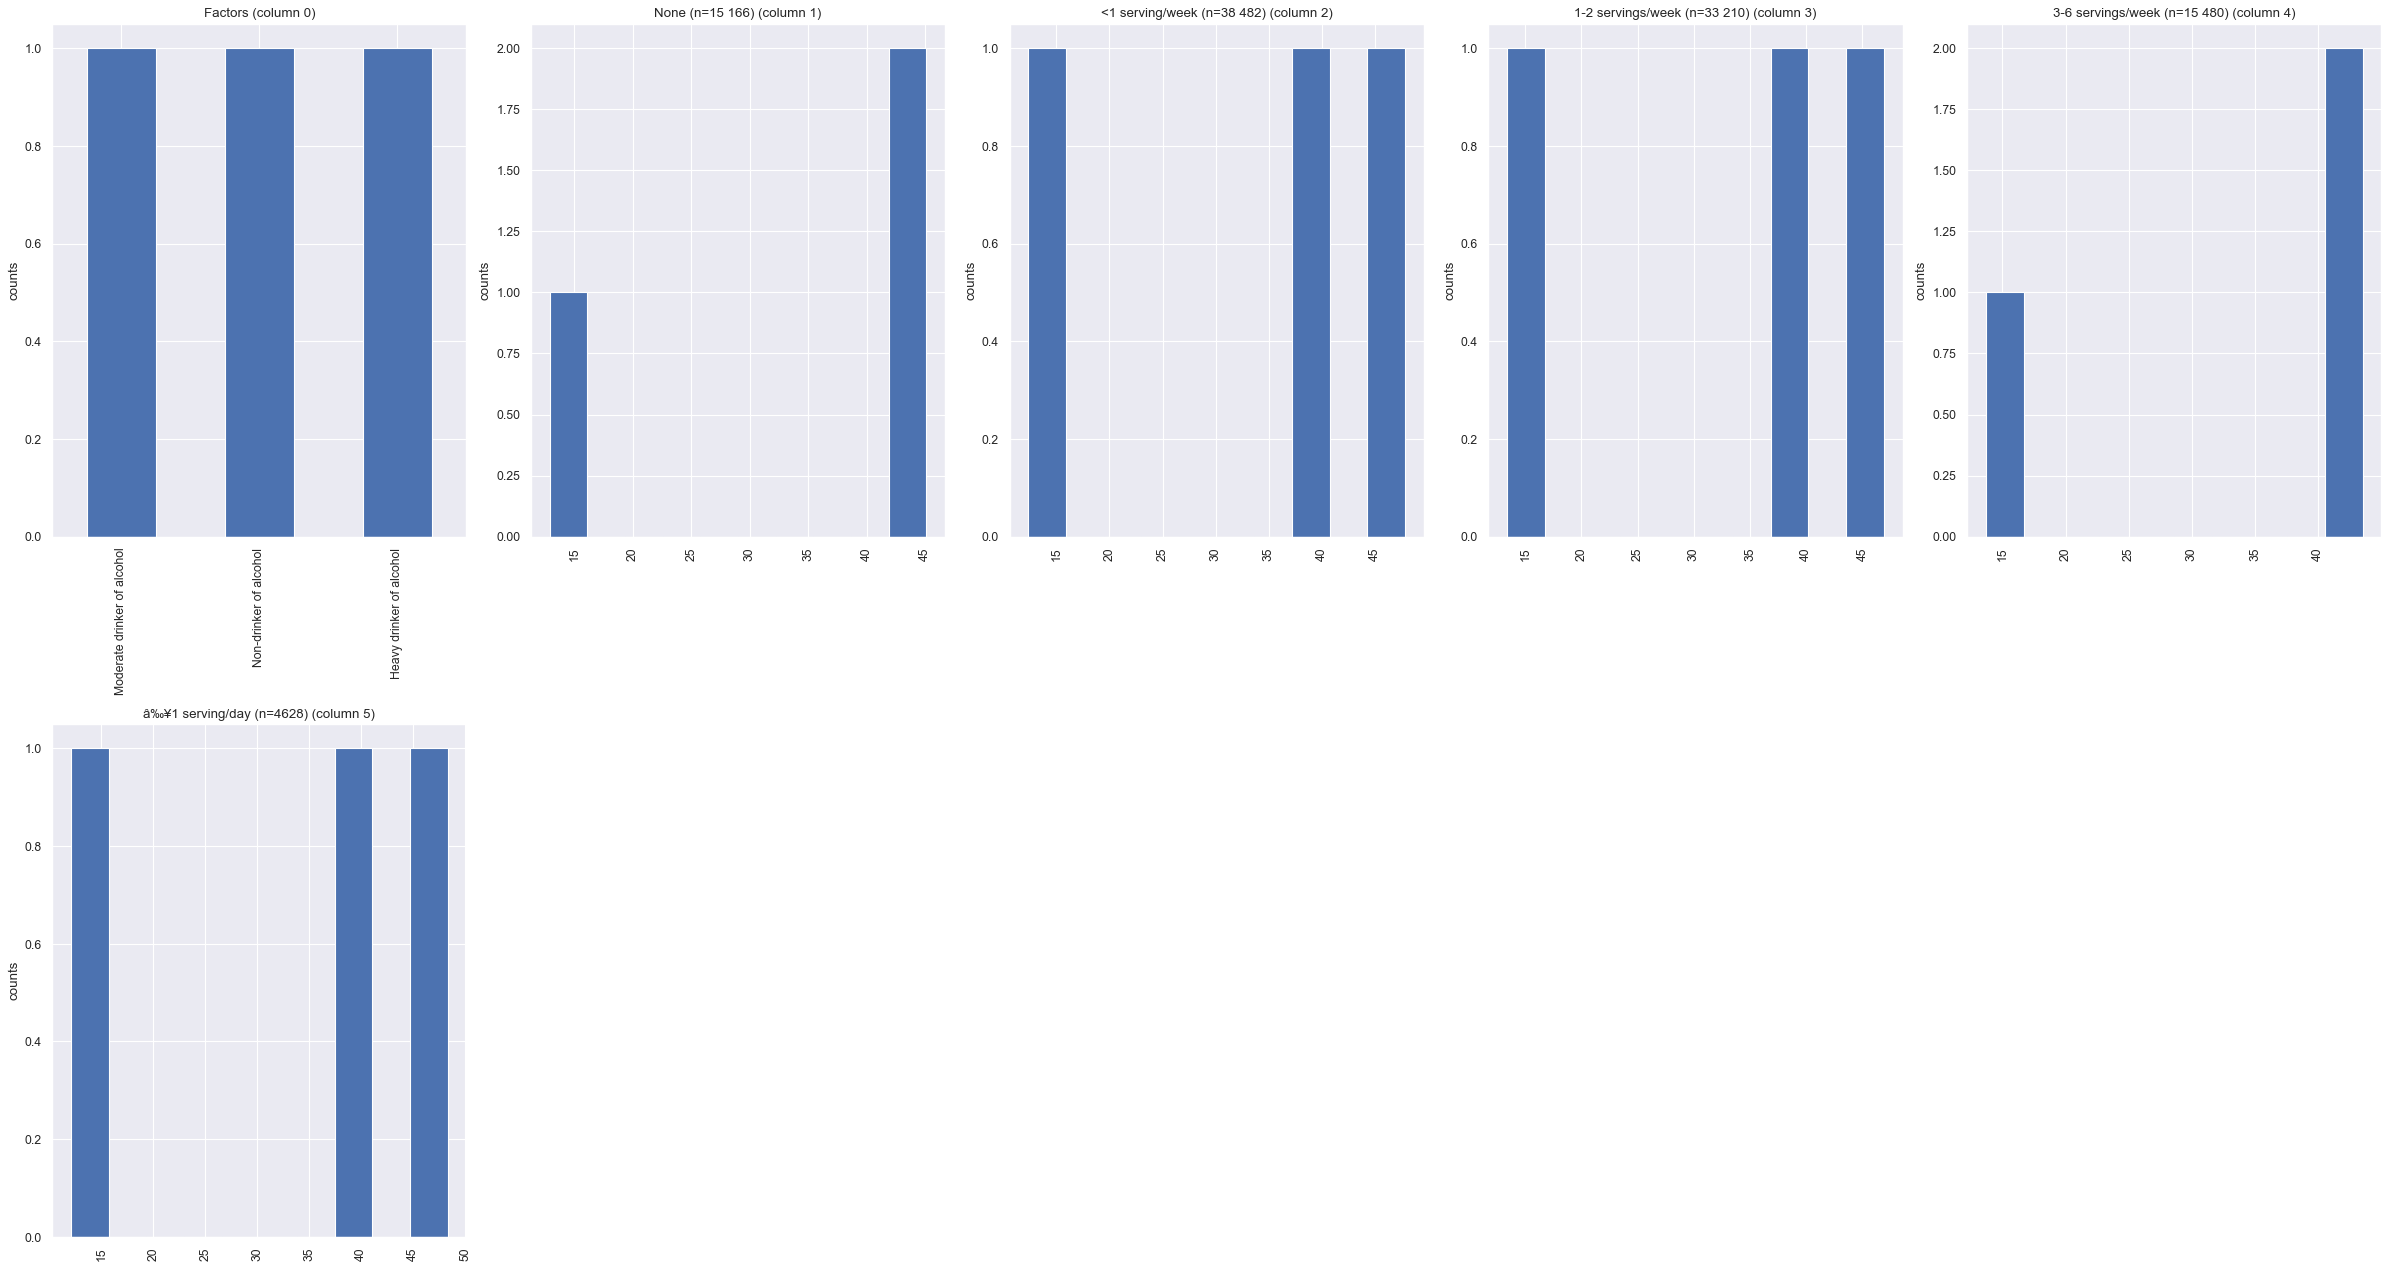

In [25]:
#line plot for Degree category
plt.plot(df7['None (n=15 166)'])
plt.plot(df7['<1 serving/week (n=38 482)'])
plt.plot(df7['1-2 servings/week (n=33 210)'])
plt.plot(df7['3-6 servings/week (n=15 480)'])
plt.plot(df7['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df7, 6, 5)

#### Category = Coffee Drinker

In [26]:
df8.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
35,Coffee Drinker,Coffee intake (medium serving/day),2.1 (1.7),2.0 (1.7),2.1 (1.8),2.2 (1.9),2.4 (2.2),<0.001
36,Coffee Drinker,Total energy intake (kcal/day)*,1377.1 (470.6),1401.4 (485.6),1593.7 (551.0),1906.2 (644.3),2470.4 (834.7),<0.001


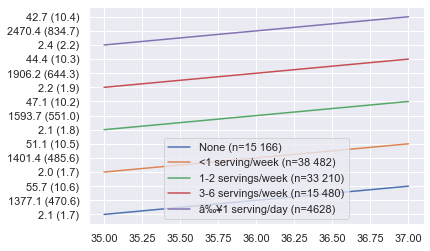

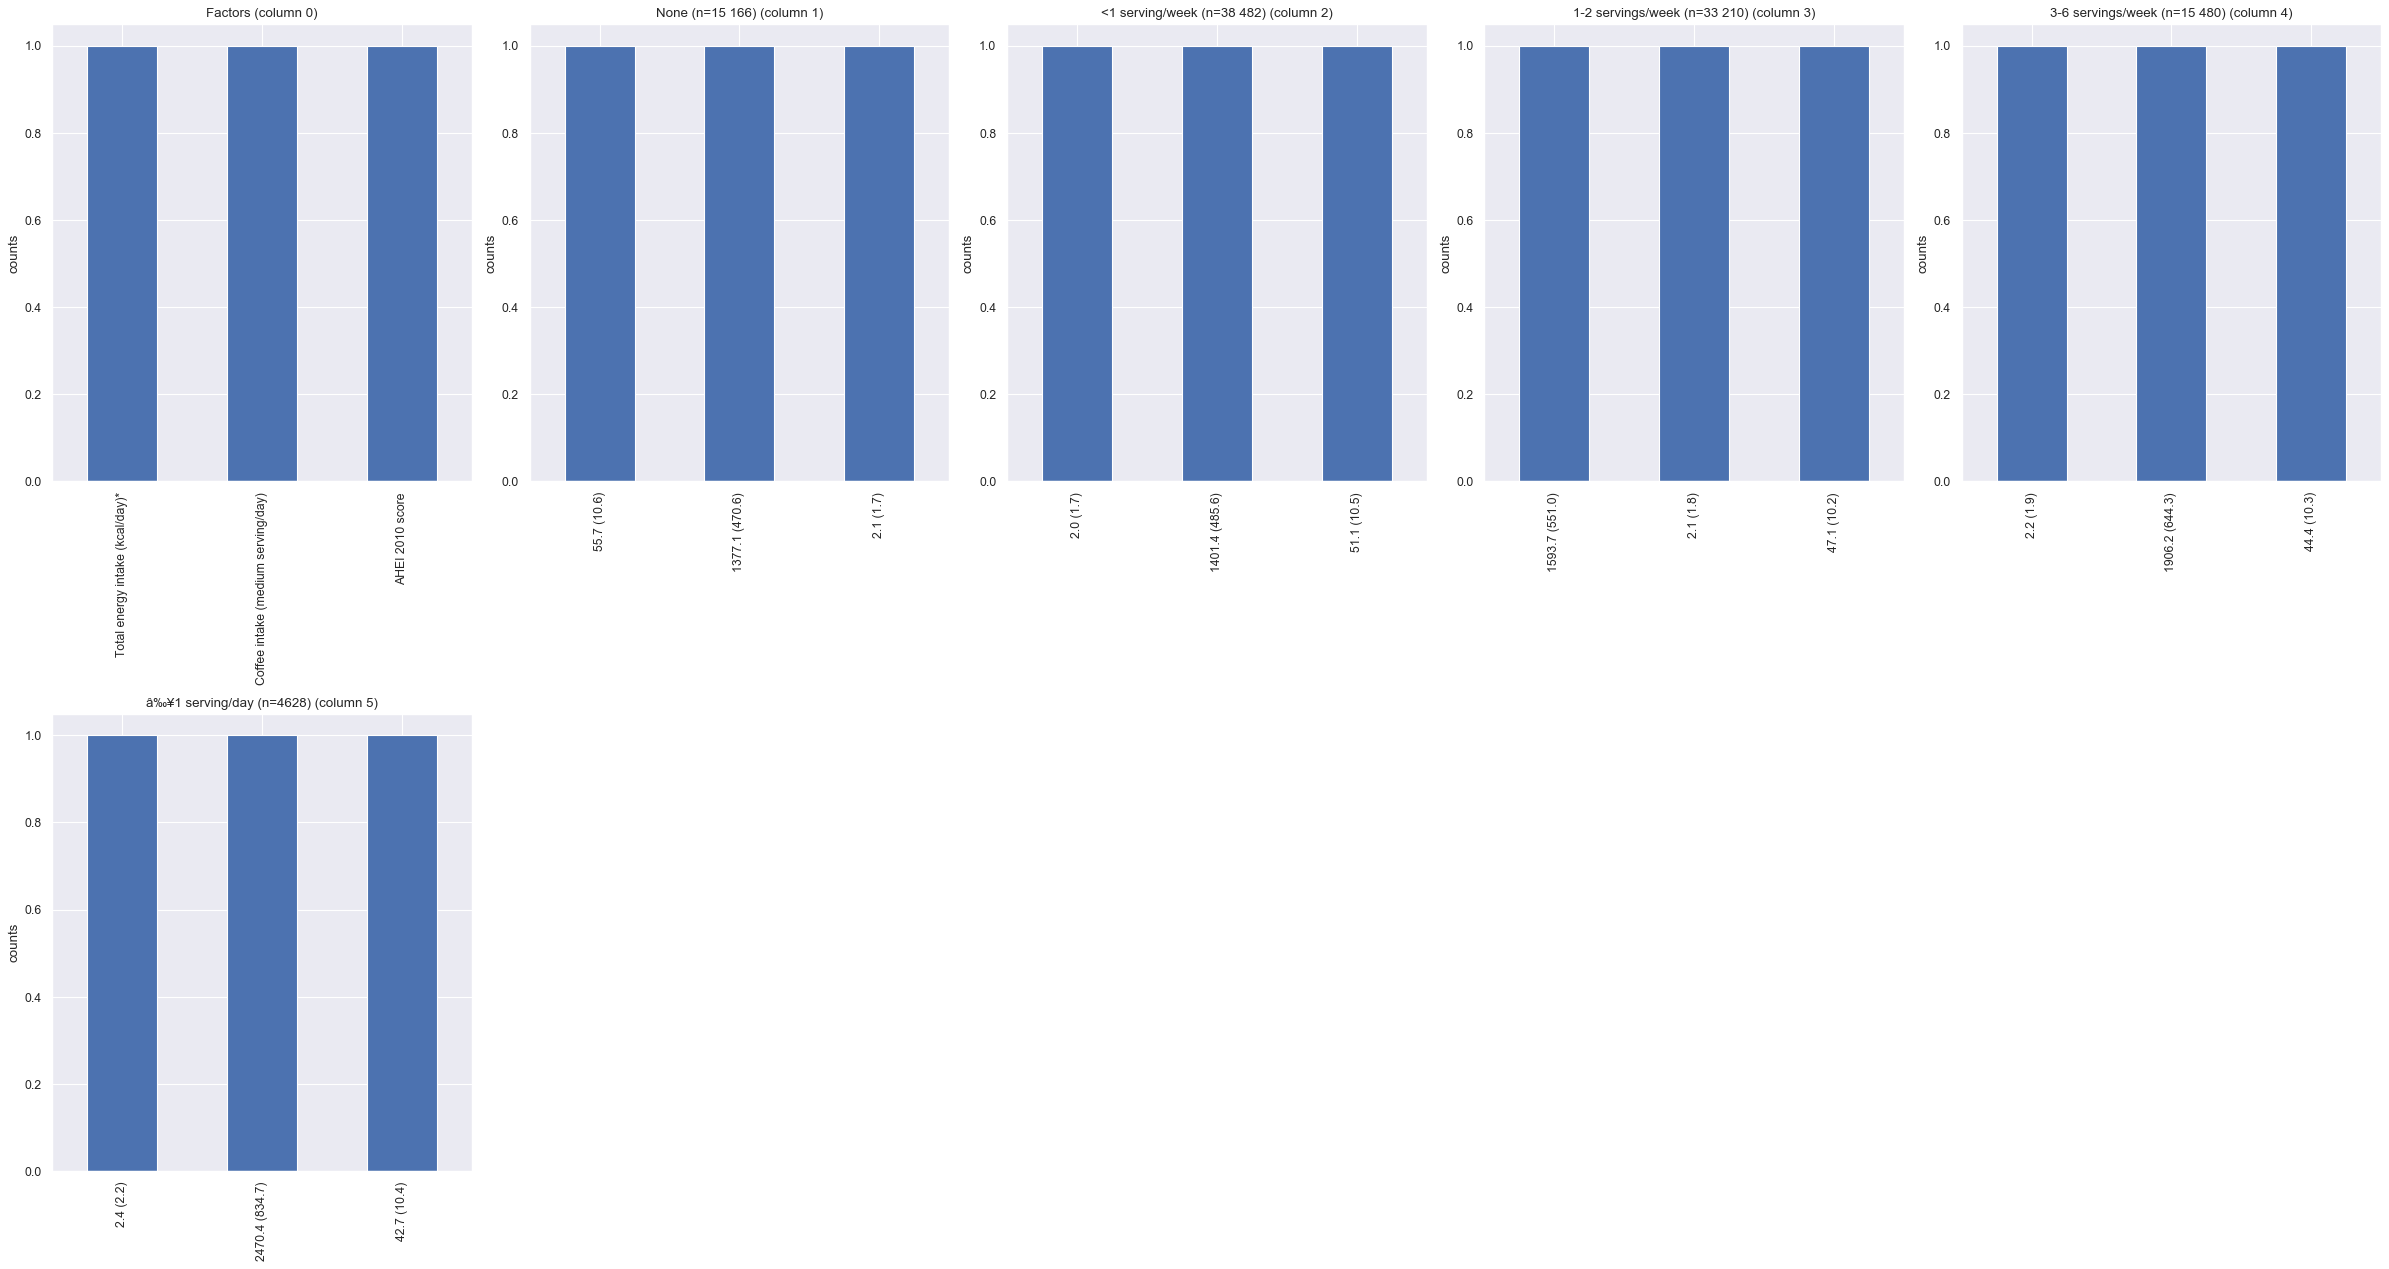

In [27]:

#line plot for Degree category
plt.plot(df8['None (n=15 166)'])
plt.plot(df8['<1 serving/week (n=38 482)'])
plt.plot(df8['1-2 servings/week (n=33 210)'])
plt.plot(df8['3-6 servings/week (n=15 480)'])
plt.plot(df8['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df8, 6, 5)

#### Category = Dibaties

In [28]:
df9.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
38,Dibaties,Baseline diabetes,4.5,4.9,5.8,7.3,9.7,<0.001
39,Dibaties,Baseline cardiovascular disease,7.0,6.3,6.3,5.8,6.1,<0.001


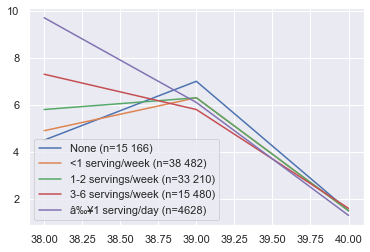

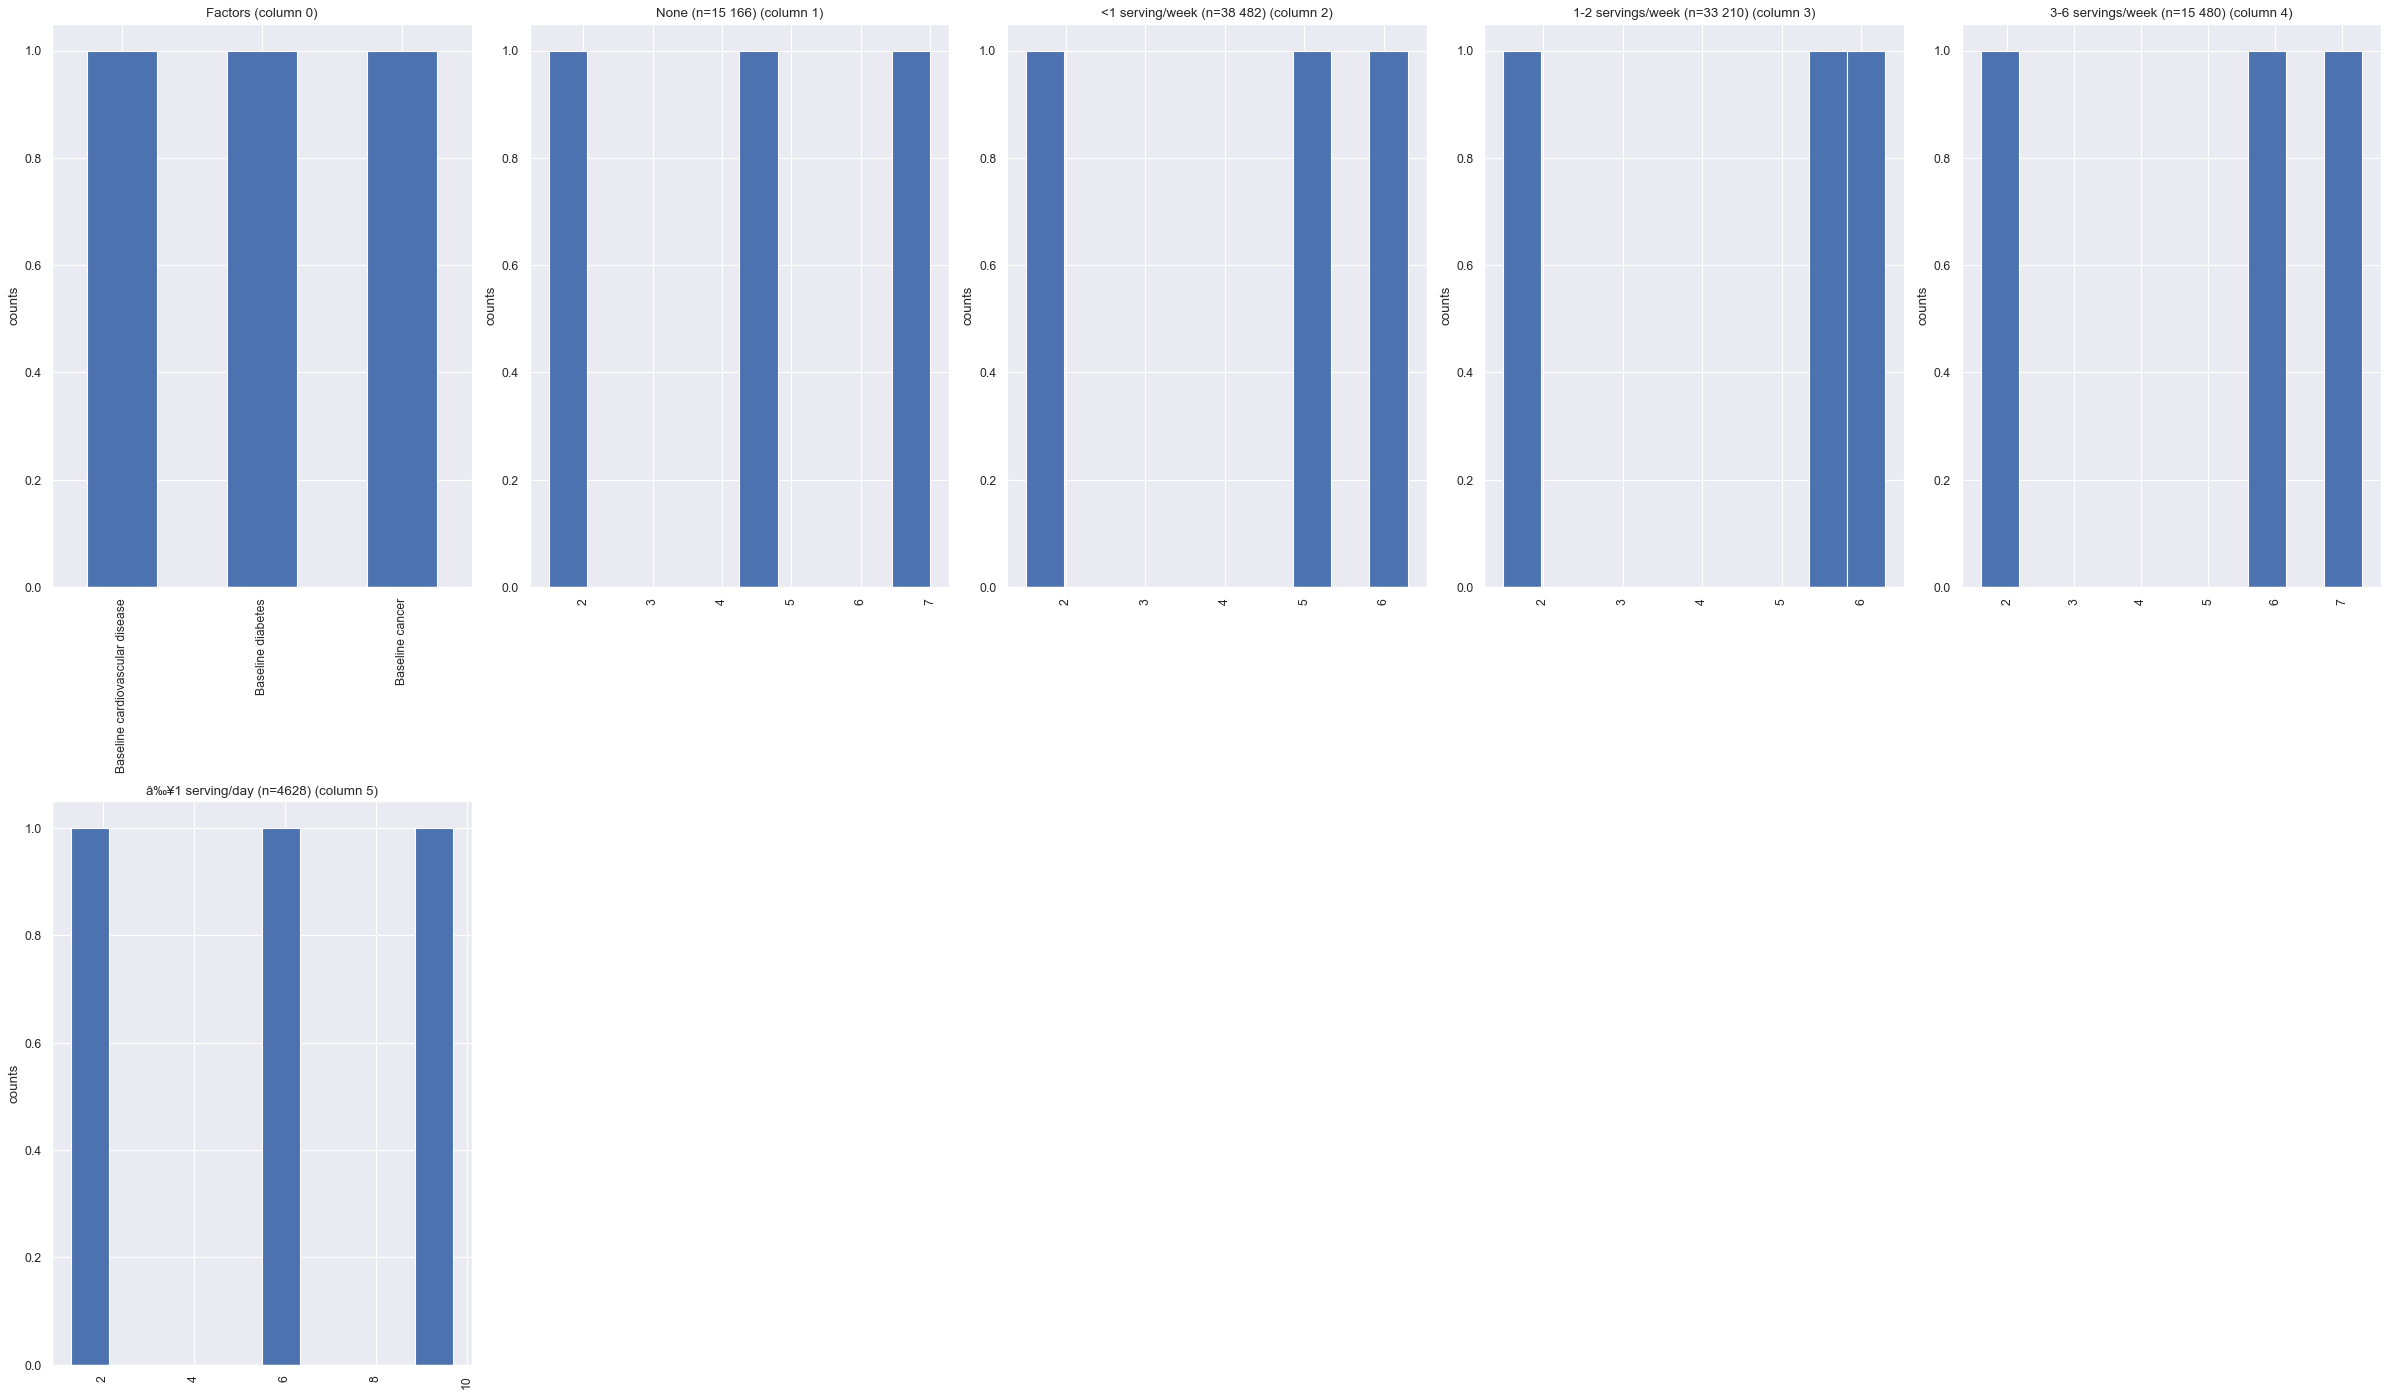

In [29]:
#line plot for Degree category
plt.plot(df9['None (n=15 166)'])
plt.plot(df9['<1 serving/week (n=38 482)'])
plt.plot(df9['1-2 servings/week (n=33 210)'])
plt.plot(df9['3-6 servings/week (n=15 480)'])
plt.plot(df9['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df9, 6, 5)

#### Category = BMI	

In [30]:
df10.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
41,BMI,<25.0 BMI,49.6,43.3,35.3,29.2,23.9,<0.001
42,BMI,25.0-29.9 BMI,31.9,34.4,34.8,34.0,30.6,NaN


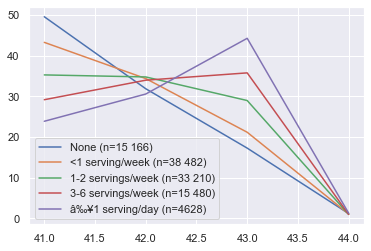

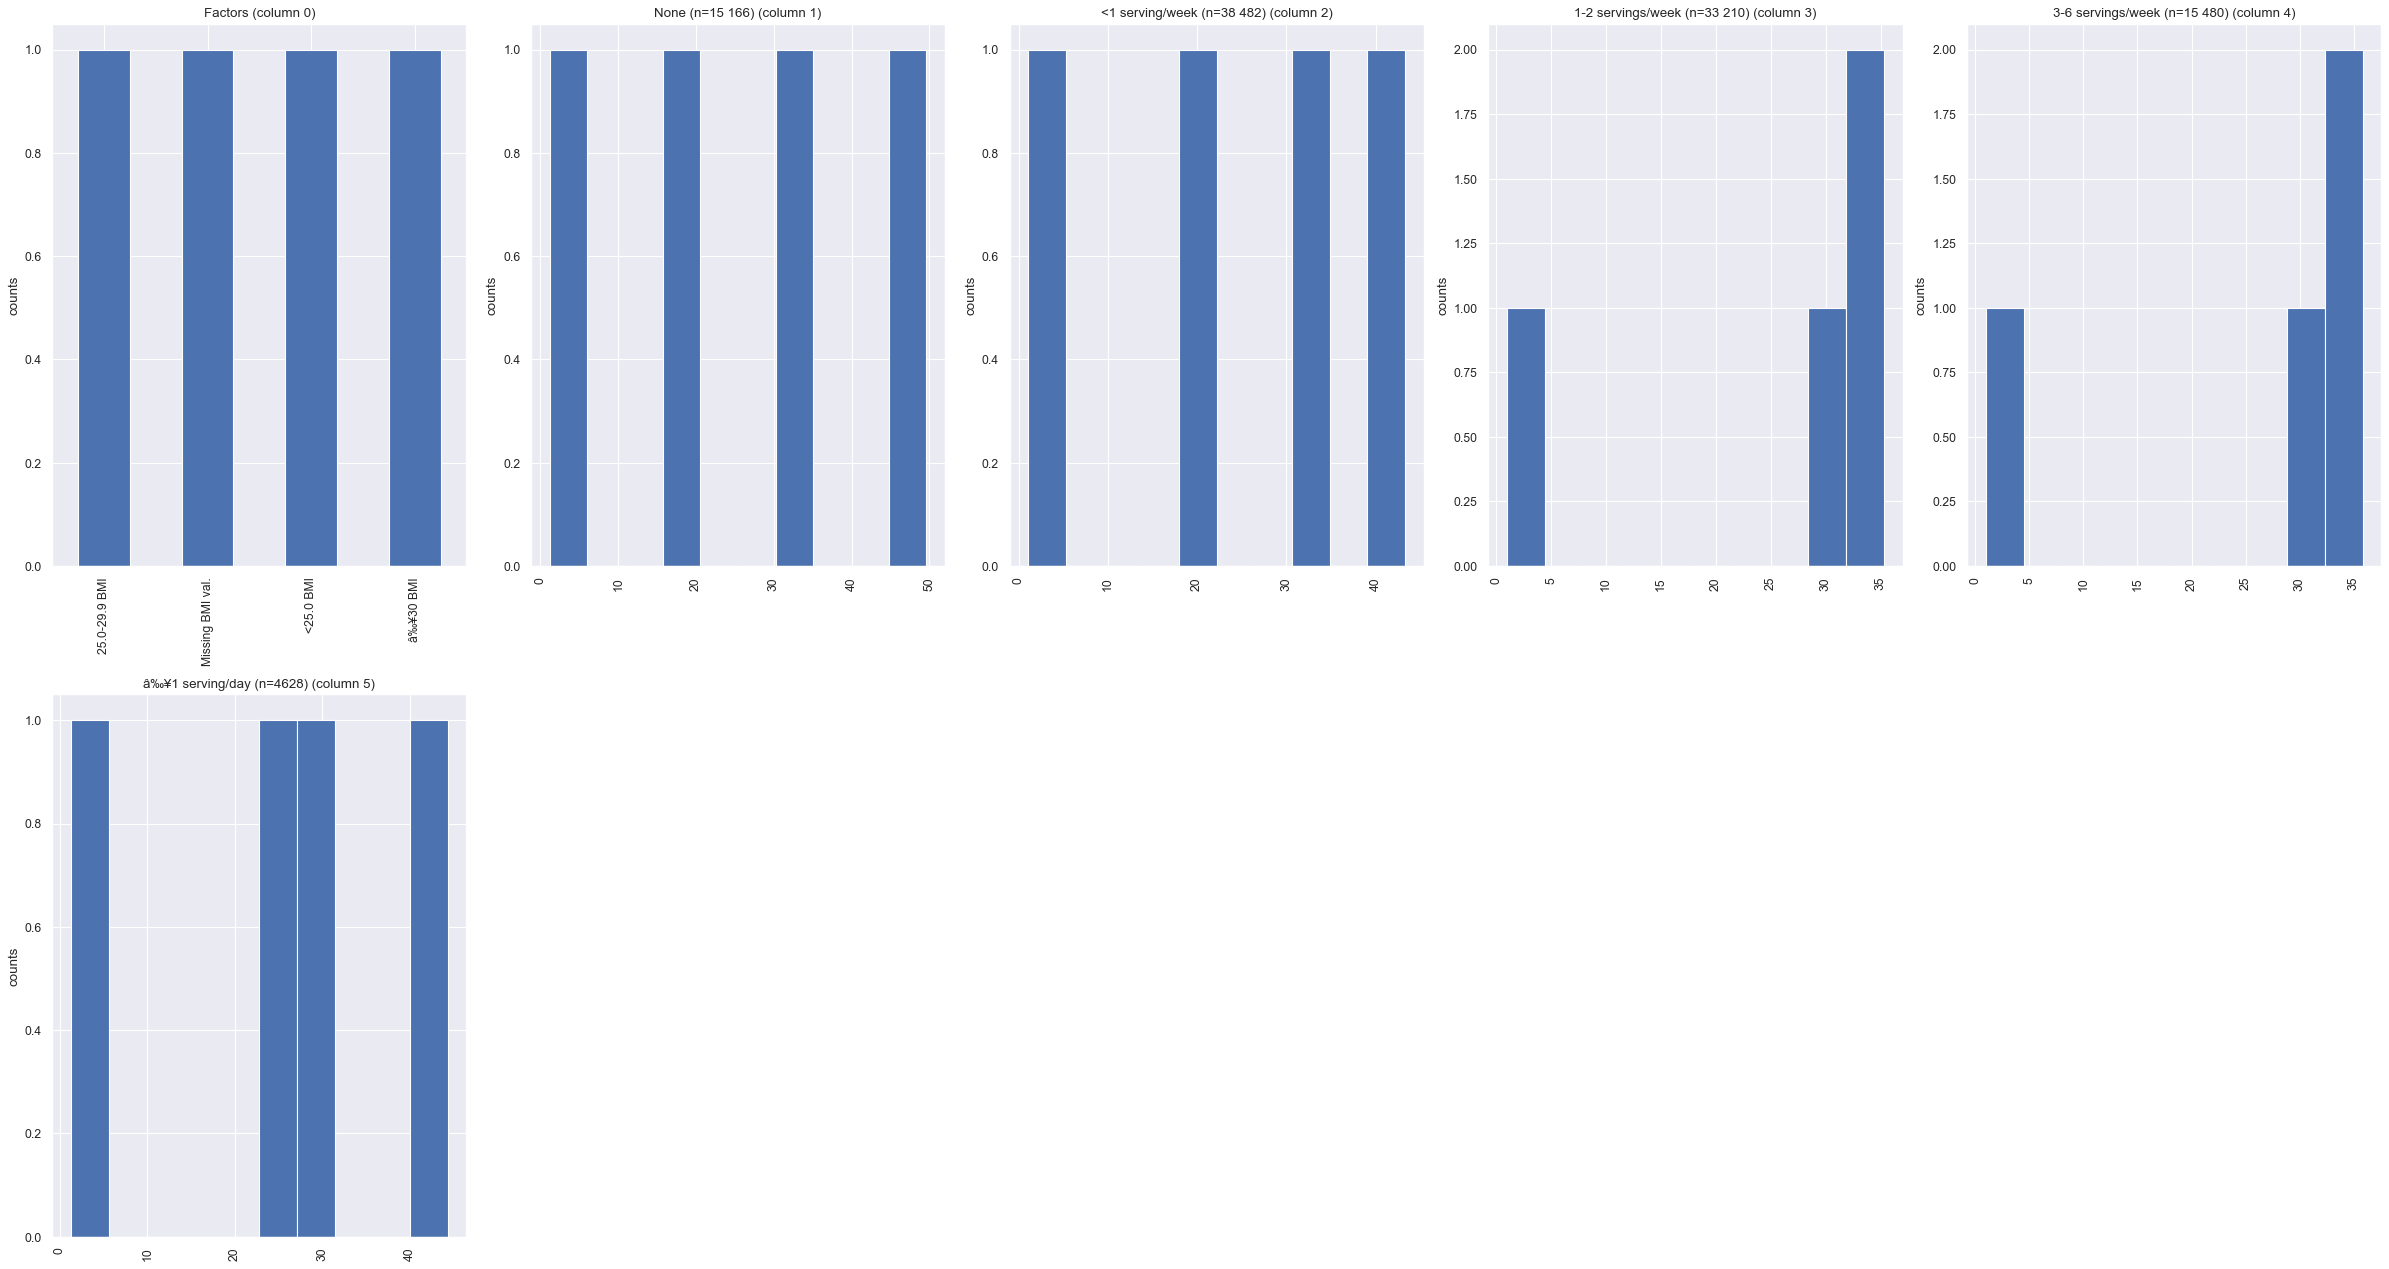

In [31]:

#line plot for Degree category
plt.plot(df10['None (n=15 166)'])
plt.plot(df10['<1 serving/week (n=38 482)'])
plt.plot(df10['1-2 servings/week (n=33 210)'])
plt.plot(df10['3-6 servings/week (n=15 480)'])
plt.plot(df10['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df10, 6, 5)

#### Category = Diet

In [32]:
df11.head(2)

,Category,Factors,None (n=15 166),<1 serving/week (n=38 482),1-2 servings/week (n=33 210),3-6 servings/week (n=15 480),â‰¥1 serving/day (n=4628),P
45,Diet,Dietary carbohydrate (%E),58.7 (9.6),54.5 (9.1),50.2 (8.6),47.2 (8.3),45.0 (8.0),<0.001
46,Diet,Dietary total fat (%E),23.6 (7.5),27.9 (7.5),32.5 (7.4),36.0 (7.3),39.0 (7.0),<0.001


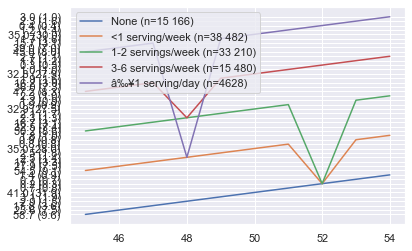

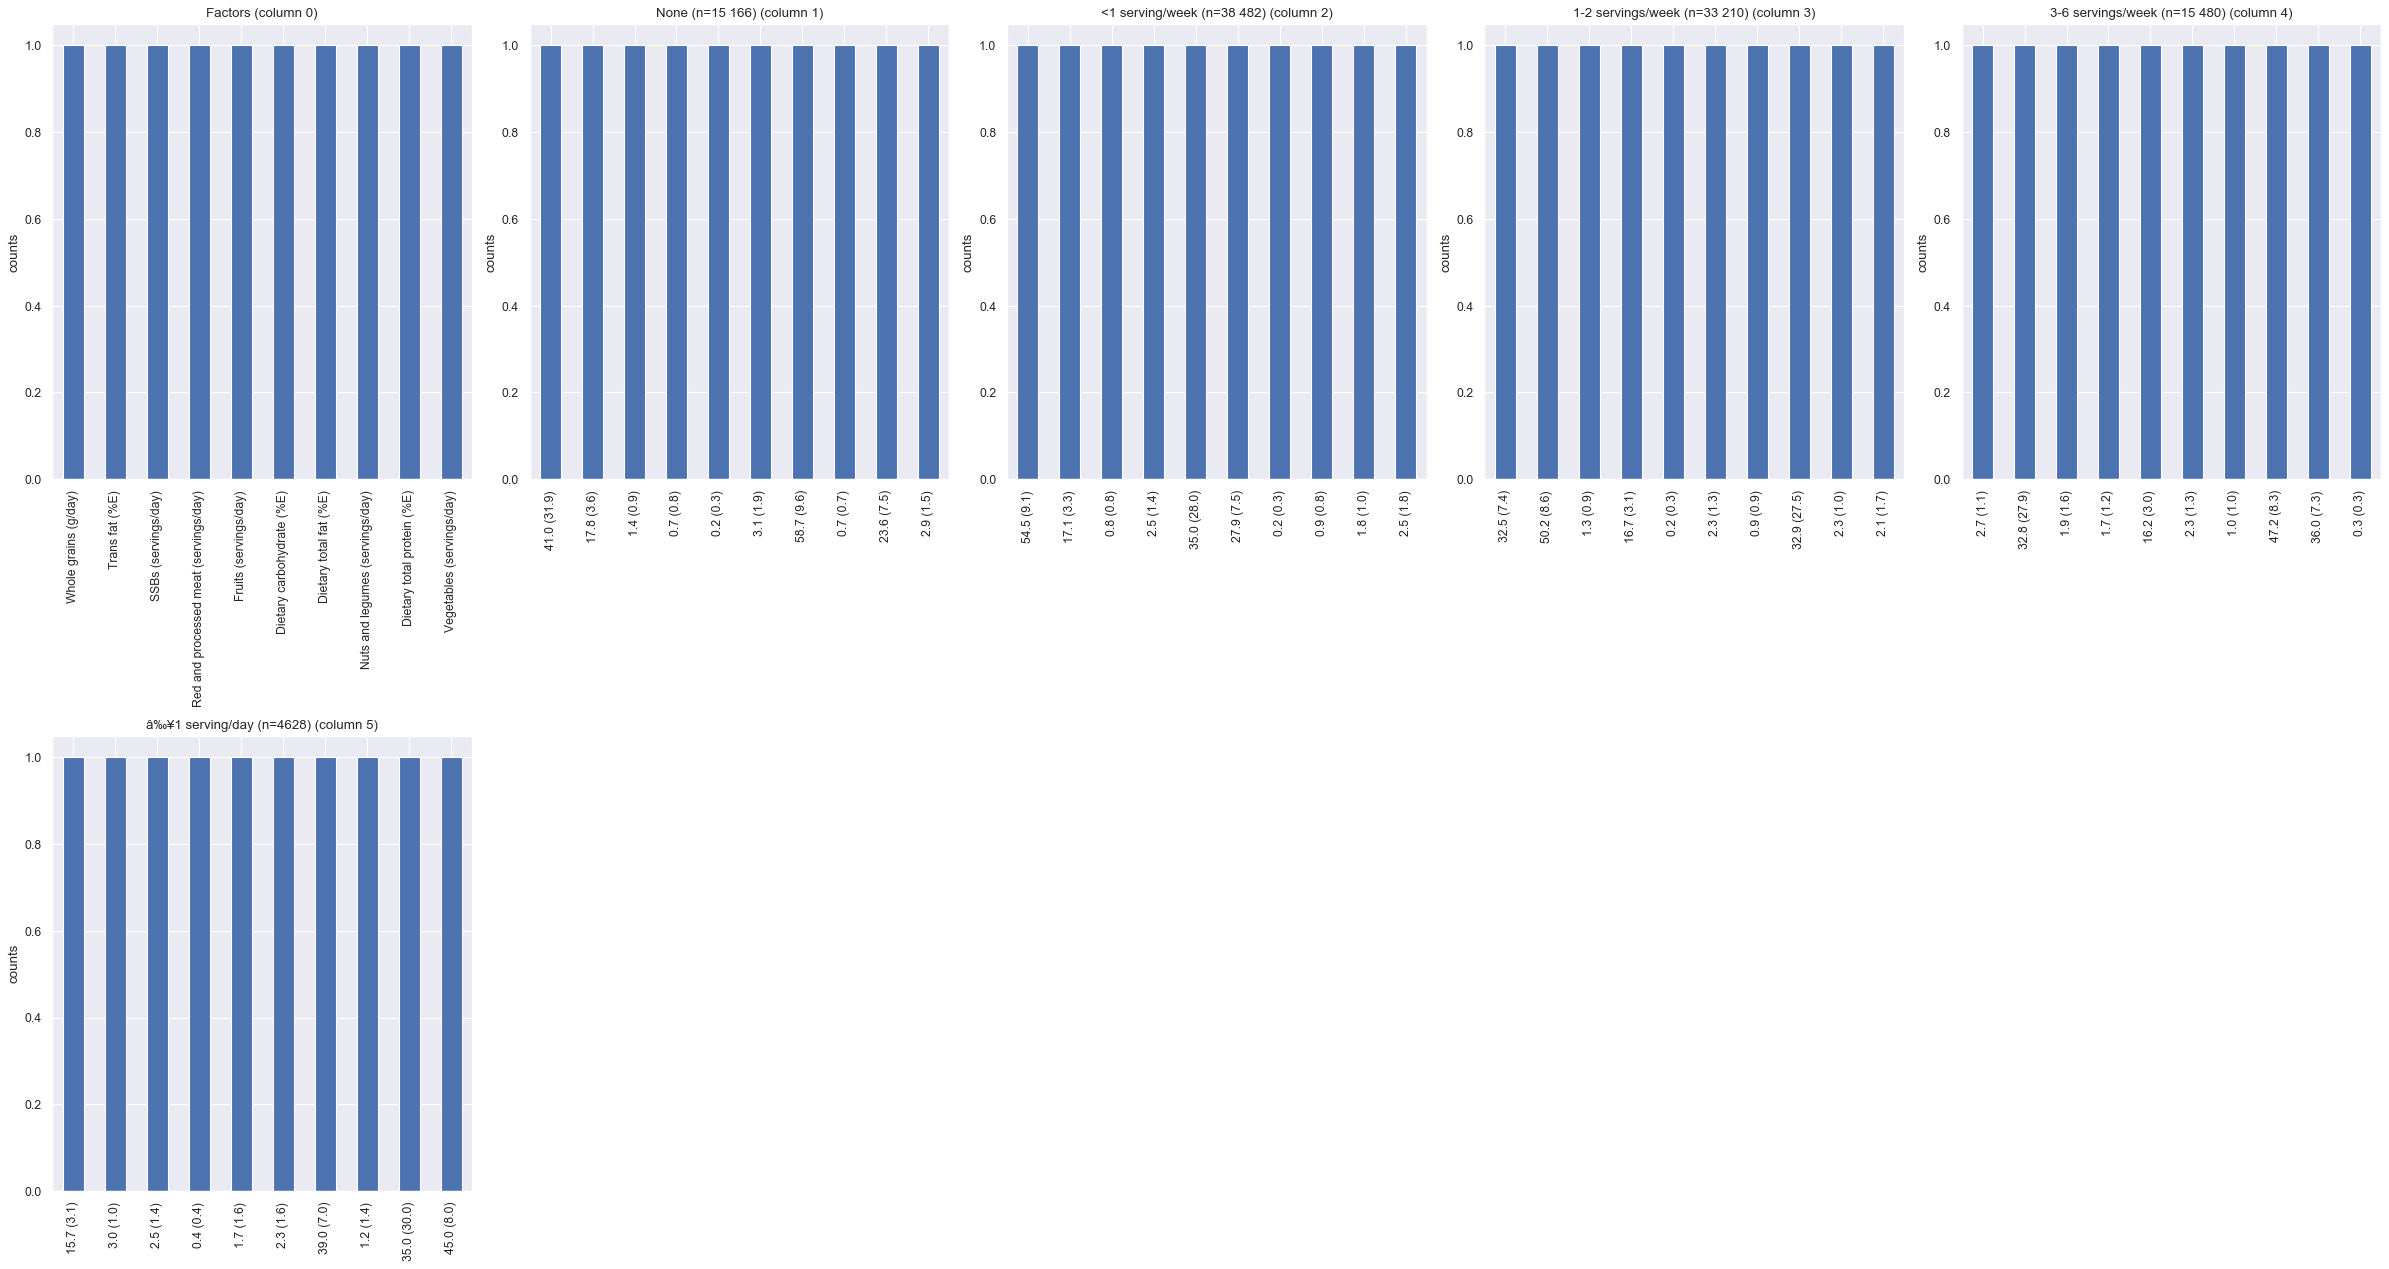

In [33]:
#line plot for Degree category
plt.plot(df11['None (n=15 166)'])
plt.plot(df11['<1 serving/week (n=38 482)'])
plt.plot(df11['1-2 servings/week (n=33 210)'])
plt.plot(df11['3-6 servings/week (n=15 480)'])
plt.plot(df11['â‰¥1 serving/day (n=4628)'])

plt.legend(labels=['None (n=15 166)','<1 serving/week (n=38 482)','1-2 servings/week (n=33 210)',
                   '3-6 servings/week (n=15 480)','â‰¥1 serving/day (n=4628)'] )

DistributionPlot(df11, 6, 5)